<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-to-test-Walk-Forward-Optimisation-'with-memory'" data-toc-modified-id="Notebook-to-test-Walk-Forward-Optimisation-'with-memory'-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook to test Walk Forward Optimisation 'with memory'</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#Test-of-strategy-position-with-different-parameters" data-toc-modified-id="Test-of-strategy-position-with-different-parameters-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Test of strategy position with different parameters</a></span></li><li><span><a href="#Test-for-checking-changes-in-strategy-position-on-the-appropriate-day" data-toc-modified-id="Test-for-checking-changes-in-strategy-position-on-the-appropriate-day-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Test for checking changes in strategy position on the appropriate day</a></span></li></ul></li><li><span><a href="#WF-optimization-with-memory---2000:2020" data-toc-modified-id="WF-optimization-with-memory---2000:2020-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>WF optimization with memory - 2000:2020</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Heatmaps-with-widgets" data-toc-modified-id="Heatmaps-with-widgets-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Heatmaps with widgets</a></span></li></ul></li><li><span><a href="#See-OOS-performance" data-toc-modified-id="See-OOS-performance-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>See OOS performance</a></span></li></ul></li></ul></div>

# Notebook to test Walk Forward Optimisation 'with memory'

### Imports

In [1]:
# Settings for notebook visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline
from IPython.core.display import HTML
HTML("""<style>.output_png img {display: block;margin-left: auto;margin-right: auto;text-align: center;vertical-align: middle;} </style>""")

In [2]:
# Necessary imports
import os
import numpy as np
import pandas as pd
import matplotlib as plt
from tqdm.auto import tqdm, trange
print("Libraries imported correctly")

Libraries imported correctly


In [3]:
os.chdir("/Users/Sergio/Documents/Master_QF/Thesis/Code/Algorithmic Strategies")
%run Functions.ipynb

### Data

In [4]:
ini_equity_default = 100
commision_default = 2/130000 + 12.5/130000 #0.000111538462, around 0.011..% of the equity

Close  Market_daily_ret
Date                                     
2020-12-24  3703.060059          0.003537
2020-12-28  3735.360107          0.008723
2020-12-29  3727.040039         -0.002227
2020-12-30  3732.040039          0.001342
2020-12-31  3756.070068          0.006439

<AxesSubplot:title={'center':'SP500'}, xlabel='Date'>

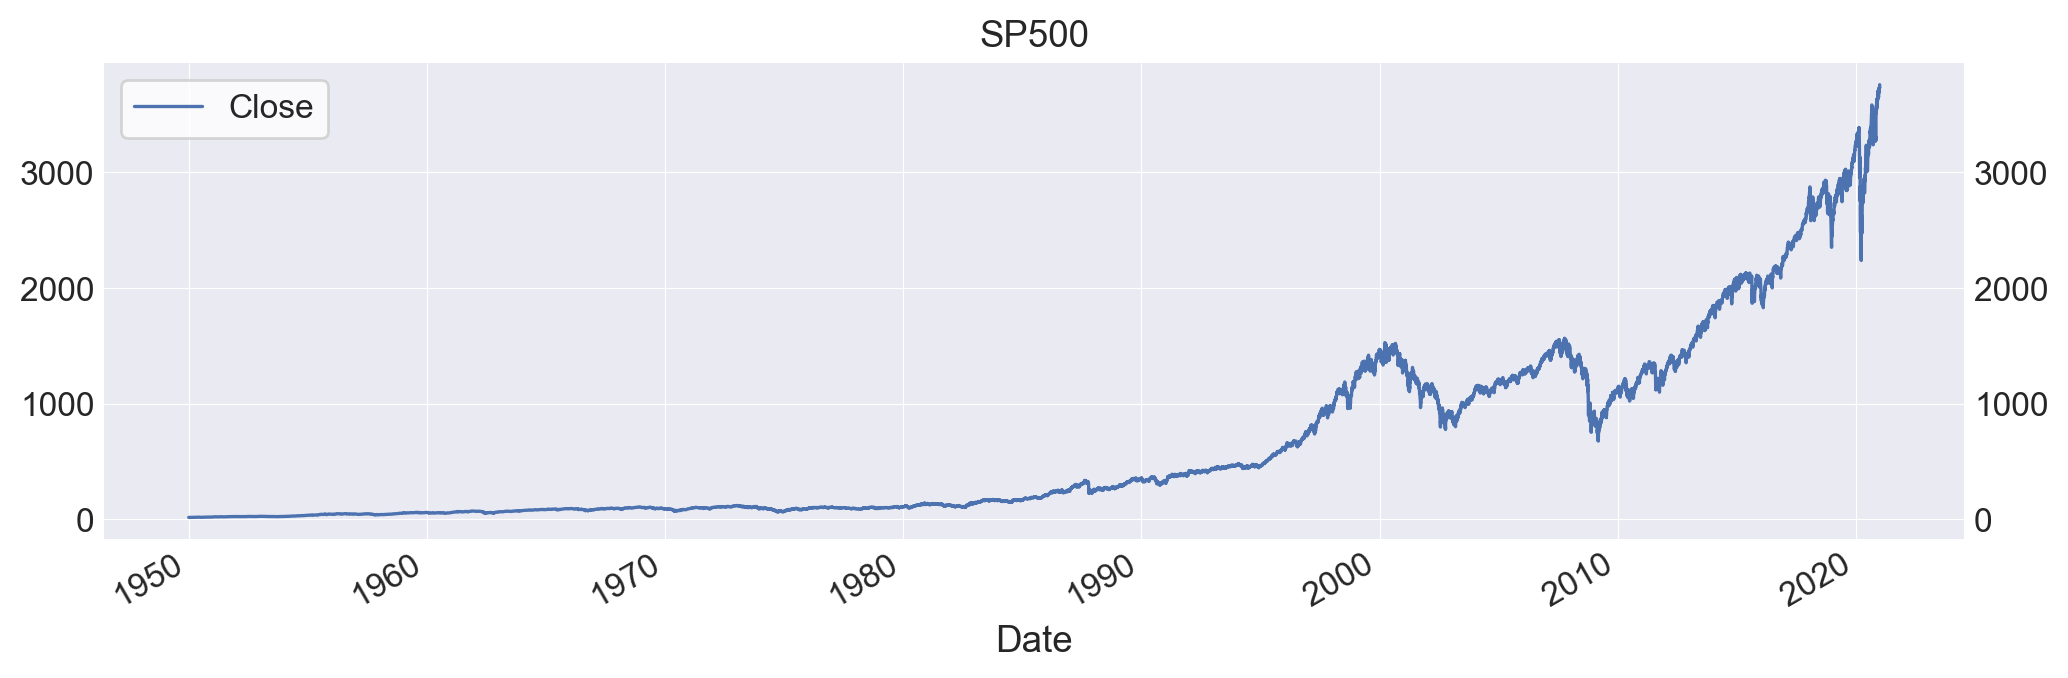

In [5]:
%run Functions.ipynb

#data = get_sp500_data(from_local_file=False, save_to_file=True)
data = get_sp500_data(from_local_file=True, save_to_file=False)
data = data[['Open', 'Close']]

data['Market_daily_ret'] = data['Close'].pct_change().fillna((data['Close']-data['Open'])/data['Open'])
data = data.loc['1950':'2020' ,['Close', 'Market_daily_ret']]

data.tail()
data['Close'].plot(title='SP500', legend=True)

## Test of strategy position with different parameters

Most classical parameters: Selling in may during 4 months

Strategy: sell_in_may_and_go_away(short from May - long from September)
Period: 2020-01-02 to 2020-12-31
	Overall return of SP500: +16.26 %. IR of SP500: 0.47
	Overall return of strategy: -3.30 %. IR strategy: -0.10


AbsRet      ARC      IR      aSD      MD     AMD     MLD    IR**  All Risk   ARCMD  ARCAMD  Num Trades  Out of market
sell_in_may_and_go_away  -3.2992  -3.2864 -0.1014  32.4181  33.925  33.925  0.8624  0.0098    3.2177 -0.0969 -0.0969           3             85
Buy and Hold             16.2589  16.1897  0.4702  34.4310  33.925  33.925  0.4928  0.2244    1.9529  0.4772  0.4772           1              0

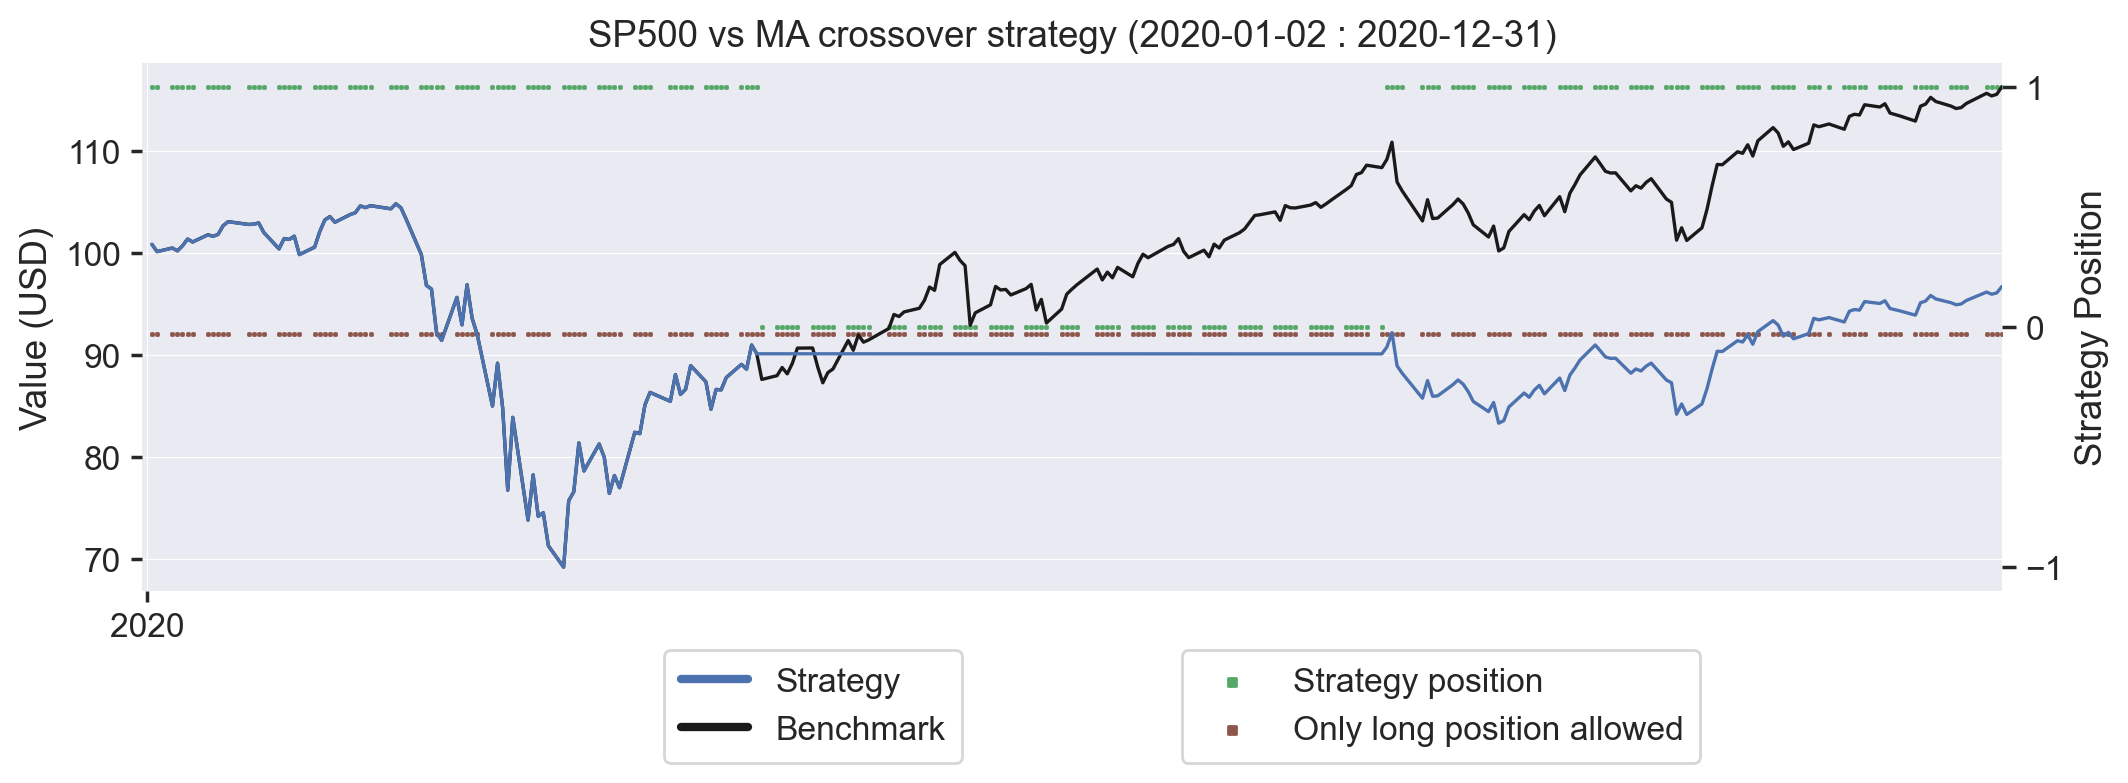

In [6]:
%run Functions.ipynb
df = data['2020'].copy() # Since 1950
sell_month = 5 # 5 to sell in May
sell_duration = 4 # 4 to sell for 4 months (May, June, July, August)
strategy = sell_in_may_and_go_away(df, sell_month, sell_duration)
df = backtest_print_plot(df, strategy, strat_name='sell_in_may_and_go_away', strat_params=(sell_month, sell_duration), with_legend=True)

metrics = calculate_performance_metrics(df, strat_name='sell_in_may_and_go_away')
metrics

Let´s try with several random combinations of parameters:

<AxesSubplot:xlabel='Date'>

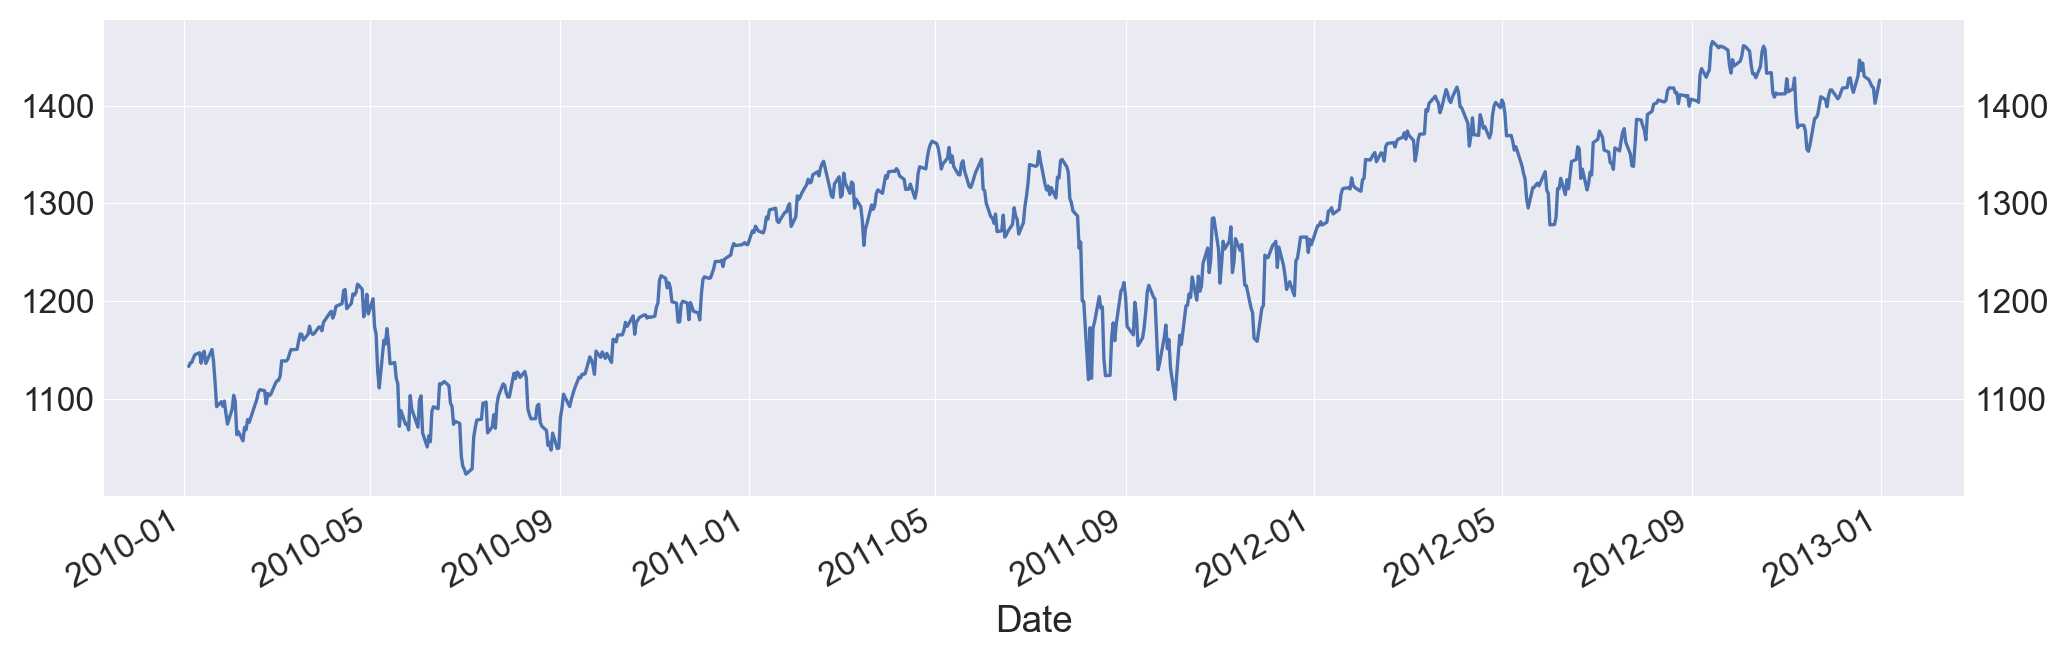

sell_month 1. sell_duration: 1
Strategy: sell_in_may_and_go_away(short from January - long from February)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +24.37 %. IR strategy: 0.42


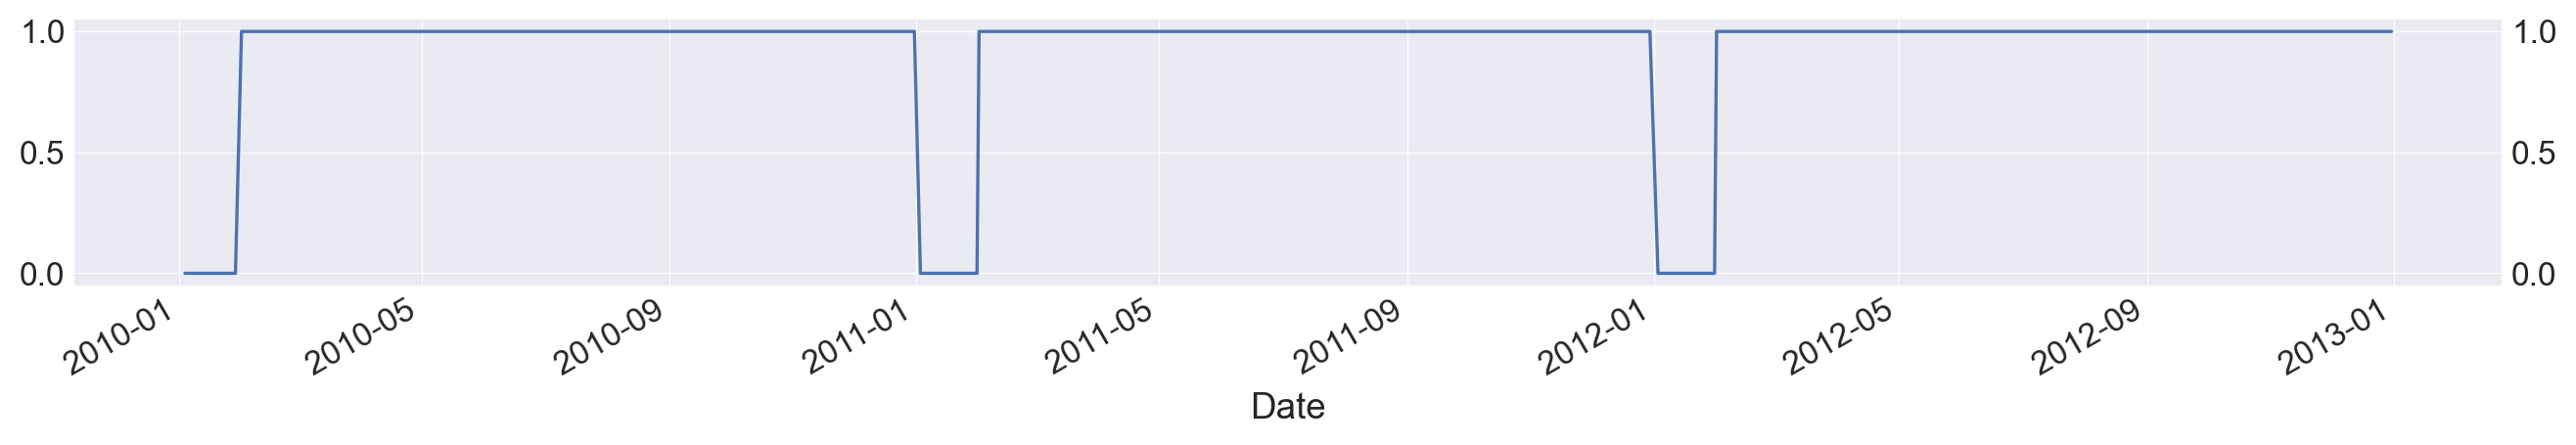

sell_month 1. sell_duration: 4
Strategy: sell_in_may_and_go_away(short from January - long from May)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: -0.34 %. IR strategy: -0.01


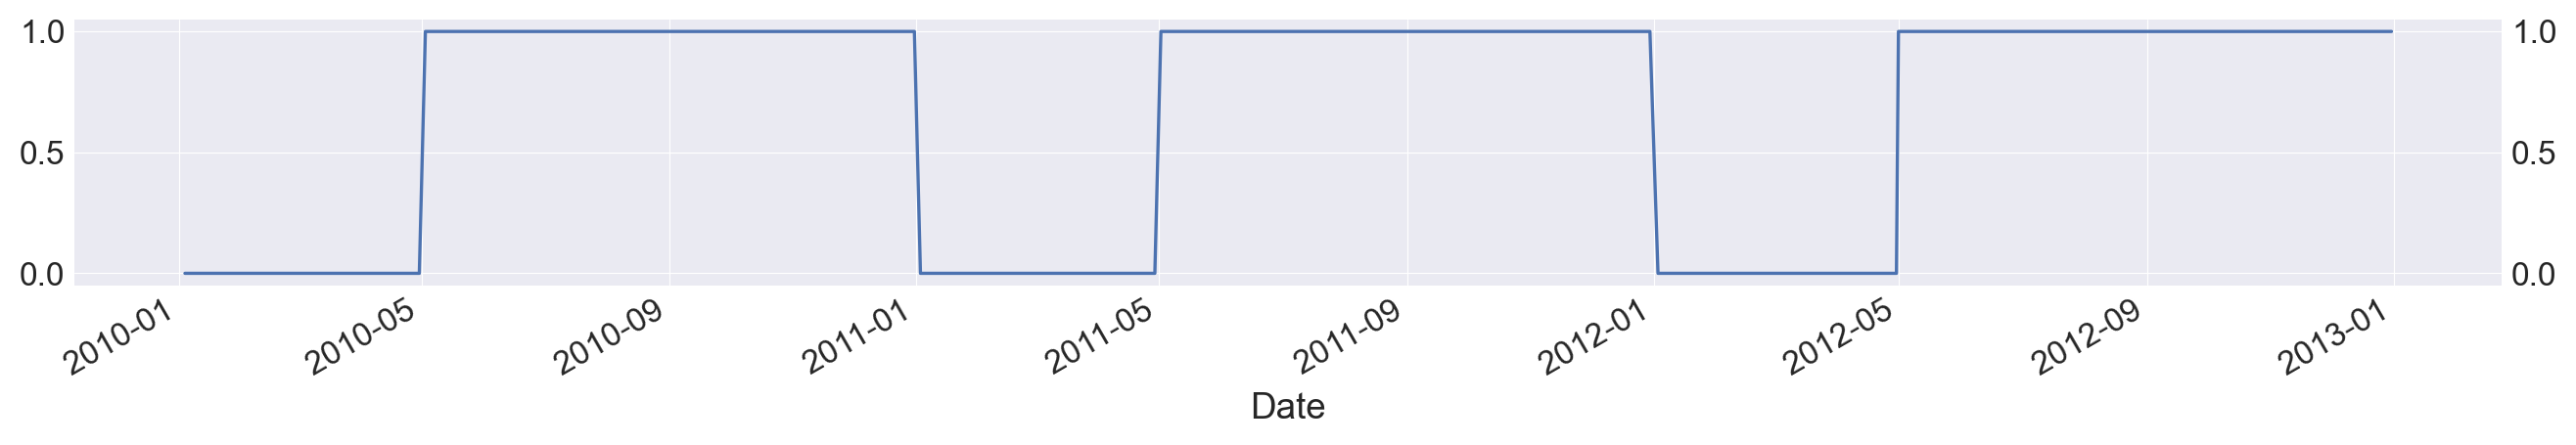

sell_month 1. sell_duration: 7
Strategy: sell_in_may_and_go_away(short from January - long from August)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +14.81 %. IR strategy: 0.34


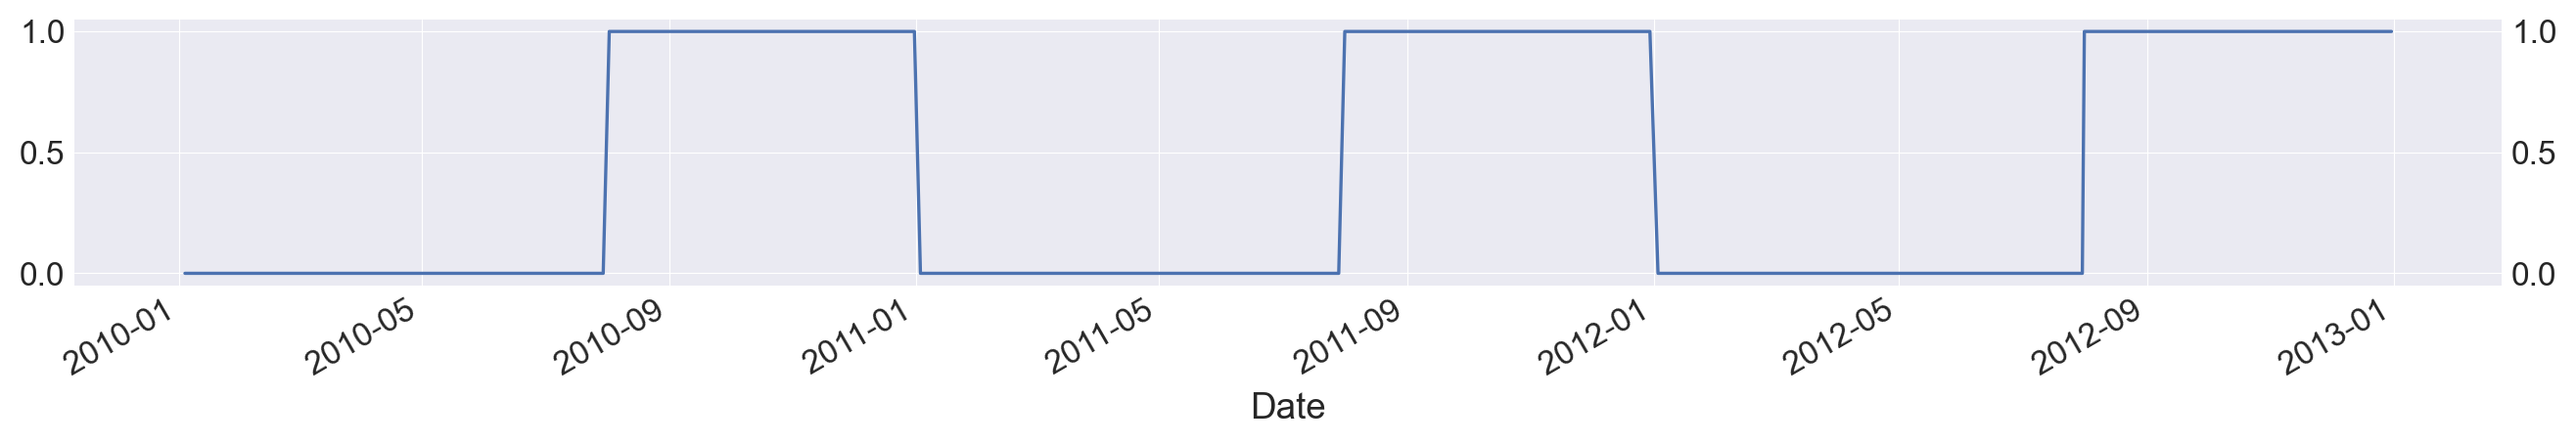

sell_month 1. sell_duration: 10
Strategy: sell_in_may_and_go_away(short from January - long from November)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +7.65 %. IR strategy: 0.34


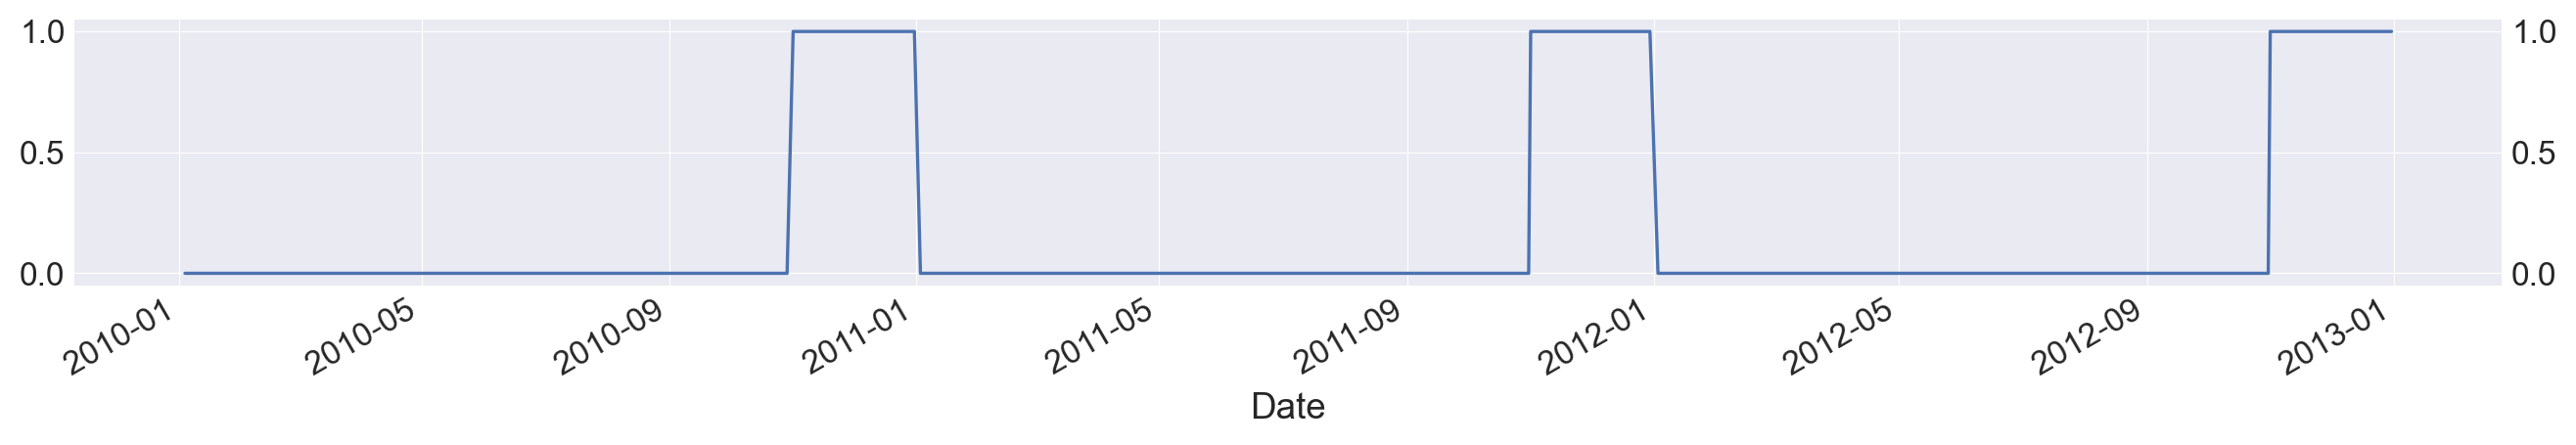

sell_month 3. sell_duration: 1
Strategy: sell_in_may_and_go_away(short from March - long from April)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +17.16 %. IR strategy: 0.30


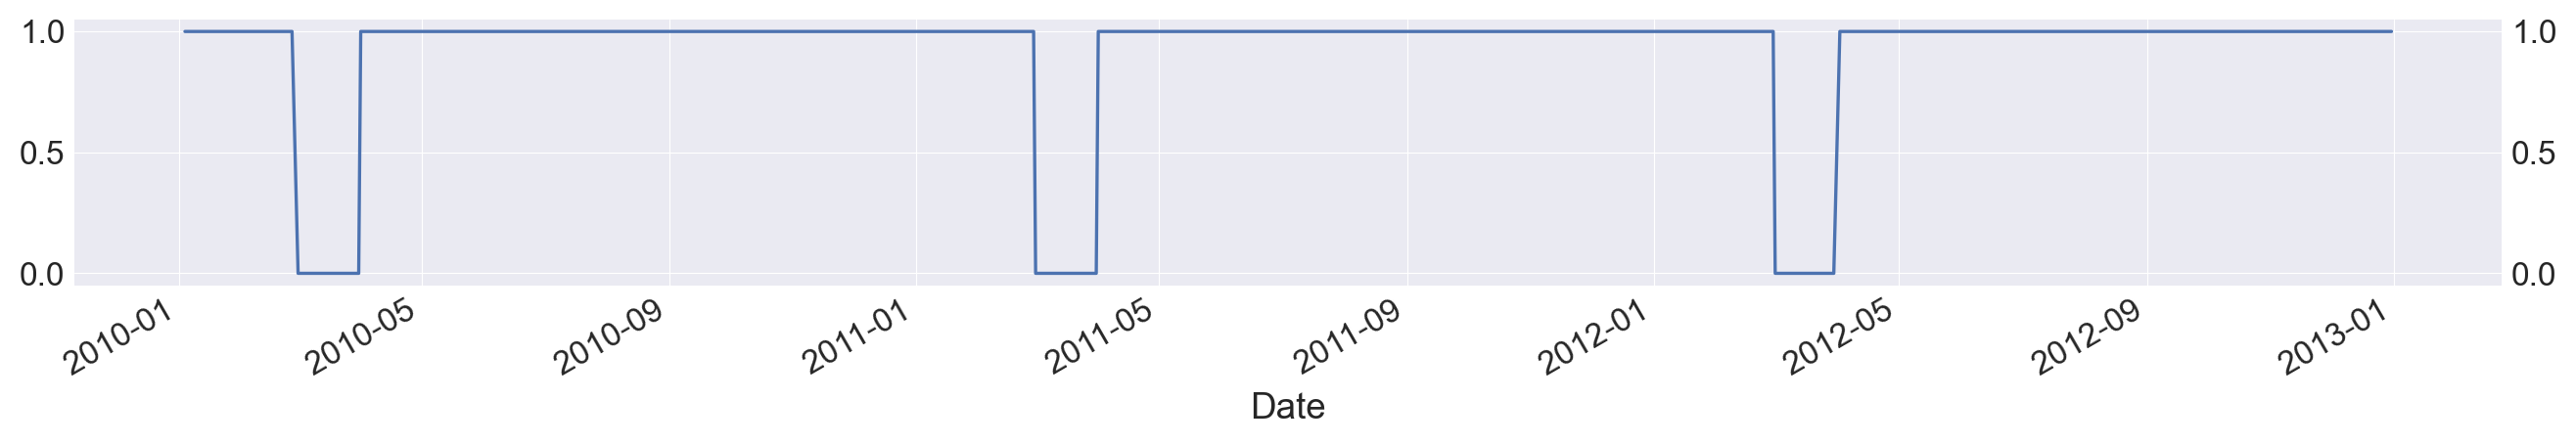

sell_month 3. sell_duration: 4
Strategy: sell_in_may_and_go_away(short from March - long from July)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +37.98 %. IR strategy: 0.73


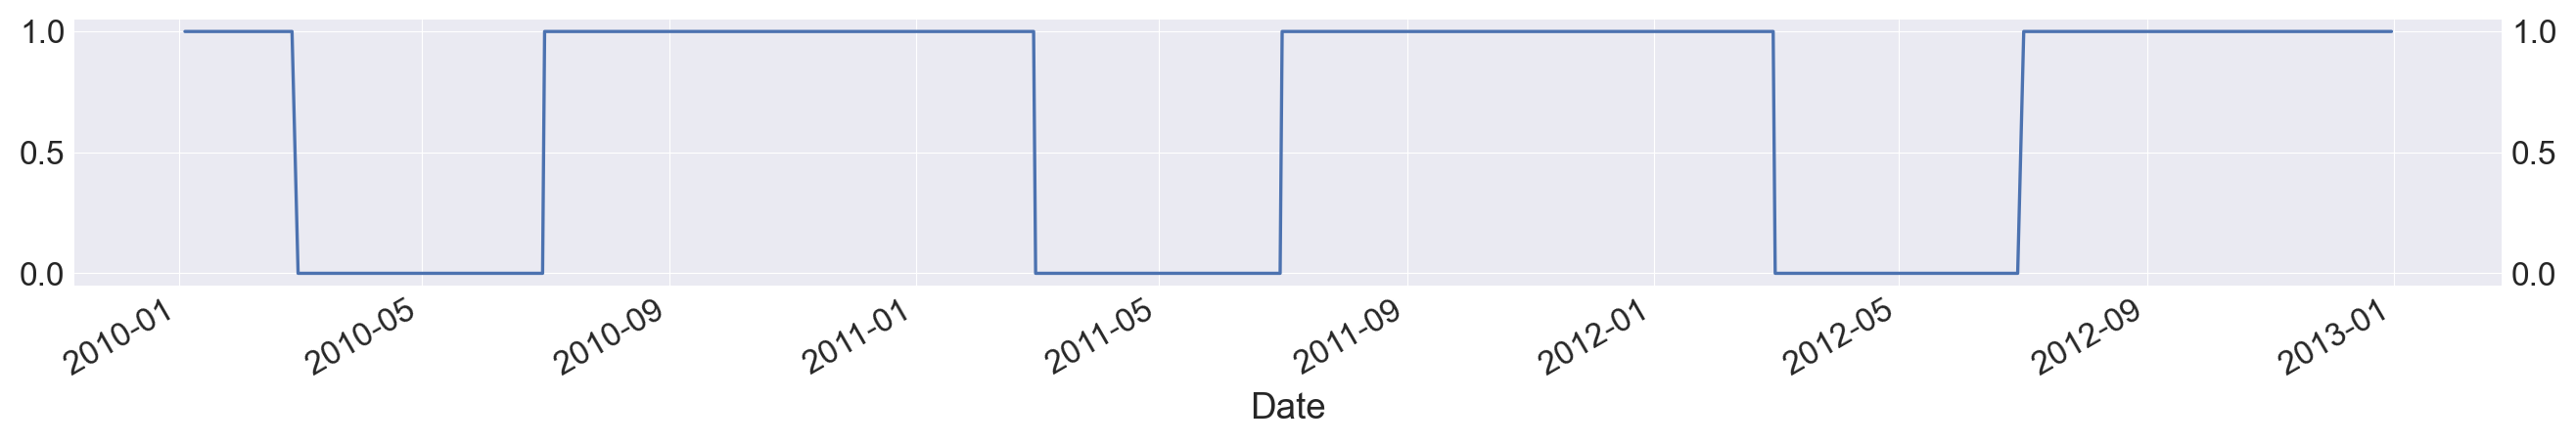

sell_month 3. sell_duration: 7
Strategy: sell_in_may_and_go_away(short from March - long from October)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +37.54 %. IR strategy: 1.07


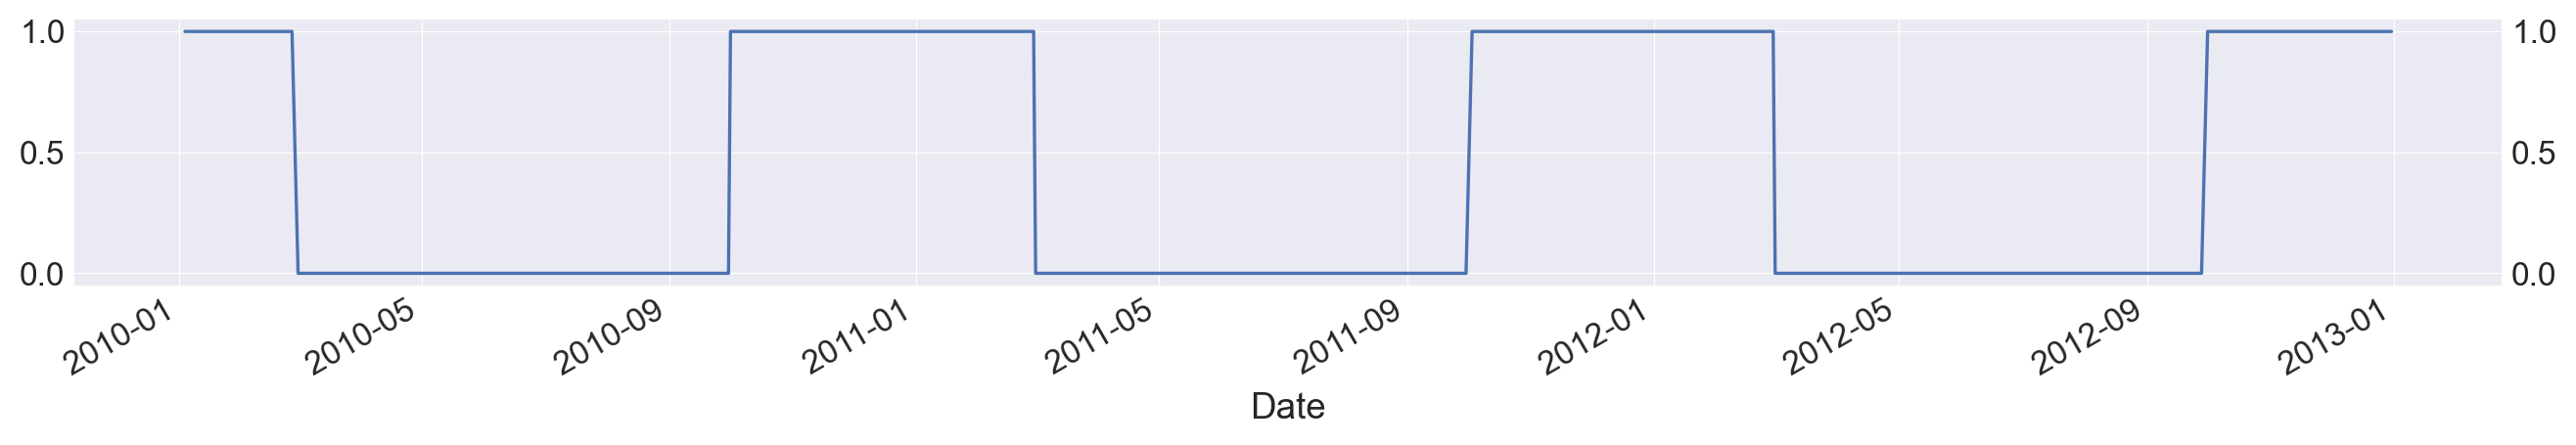

sell_month 3. sell_duration: 10
Strategy: sell_in_may_and_go_away(short from March - long from January)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +13.44 %. IR strategy: 0.86


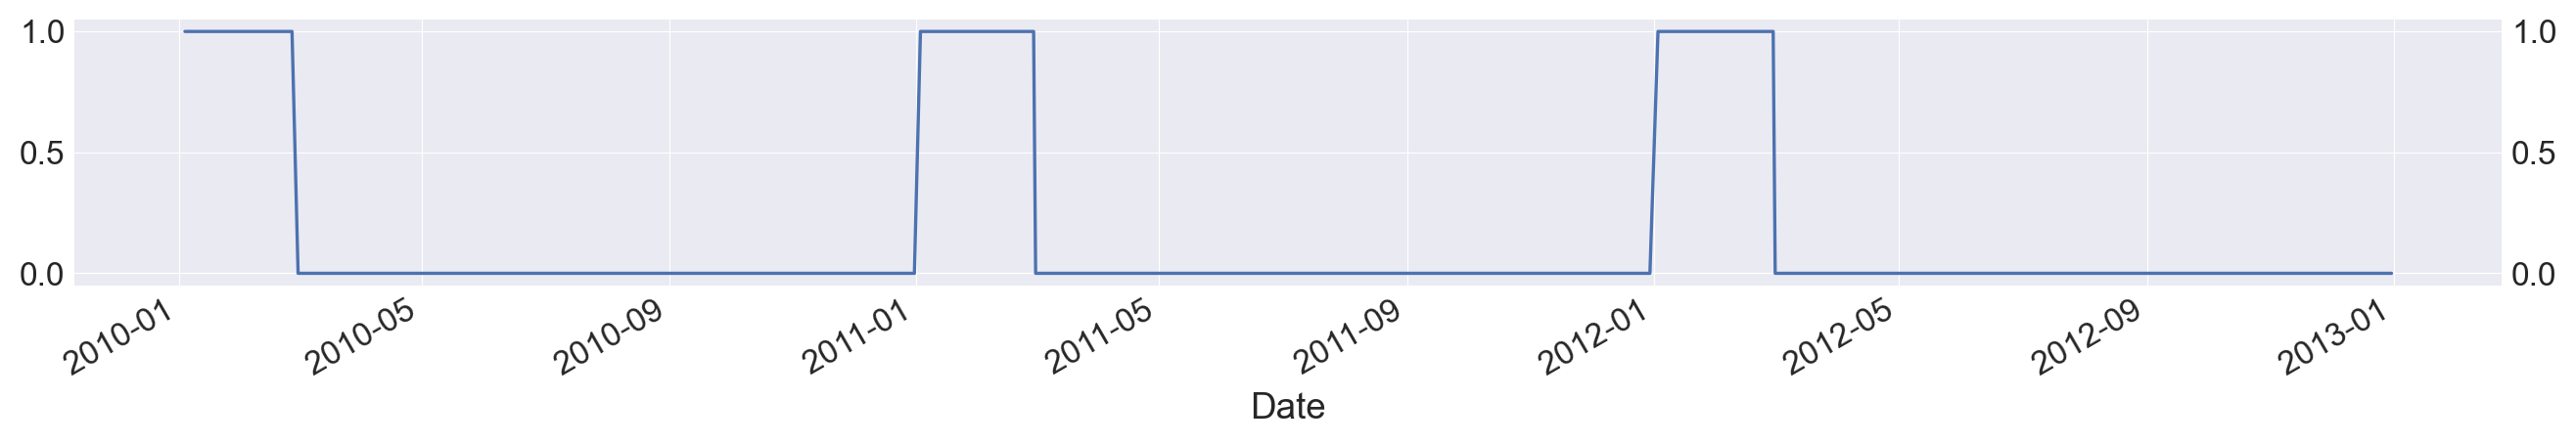

sell_month 5. sell_duration: 1
Strategy: sell_in_may_and_go_away(short from May - long from June)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +50.55 %. IR strategy: 0.84


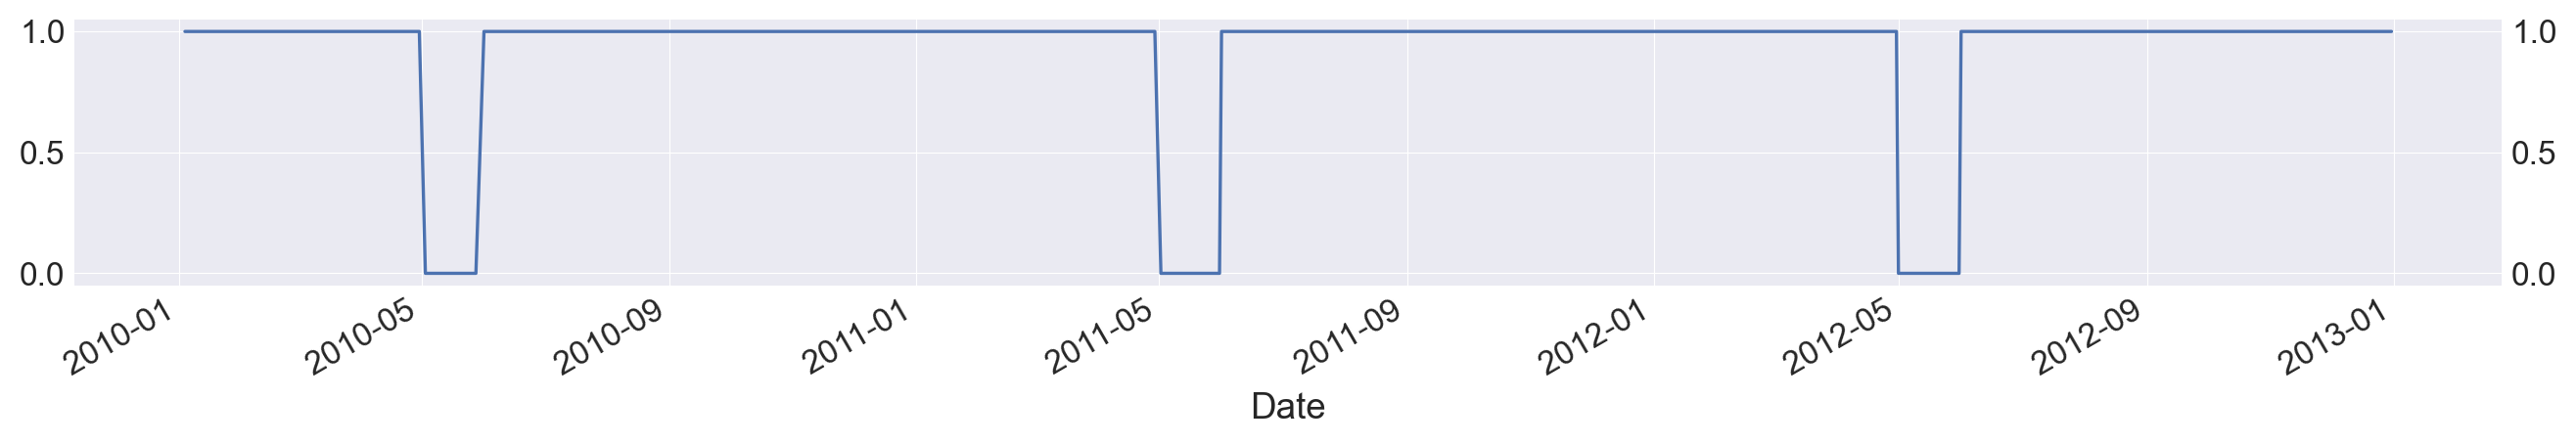

sell_month 5. sell_duration: 4
Strategy: sell_in_may_and_go_away(short from May - long from September)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +60.69 %. IR strategy: 1.31


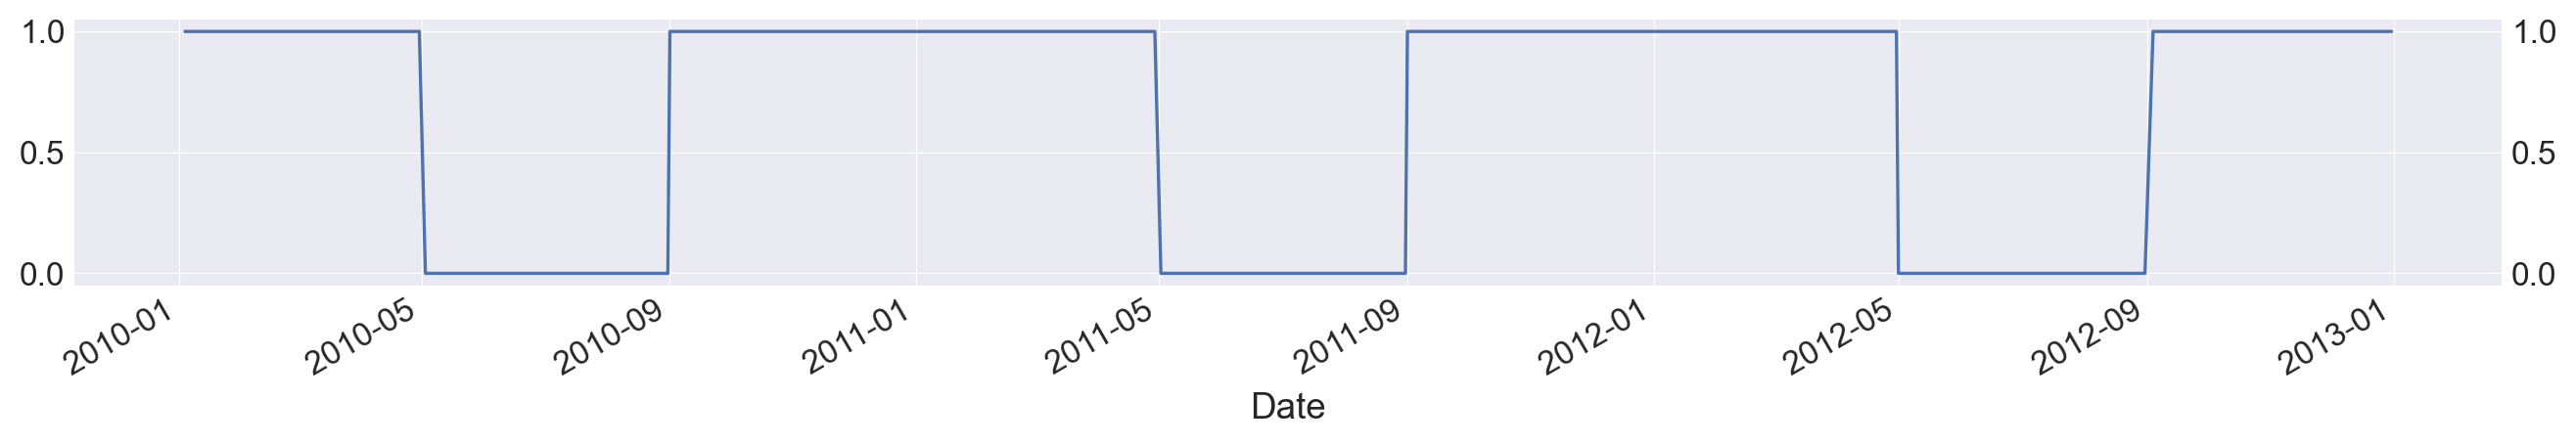

sell_month 5. sell_duration: 7
Strategy: sell_in_may_and_go_away(short from May - long from December)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +38.67 %. IR strategy: 1.40


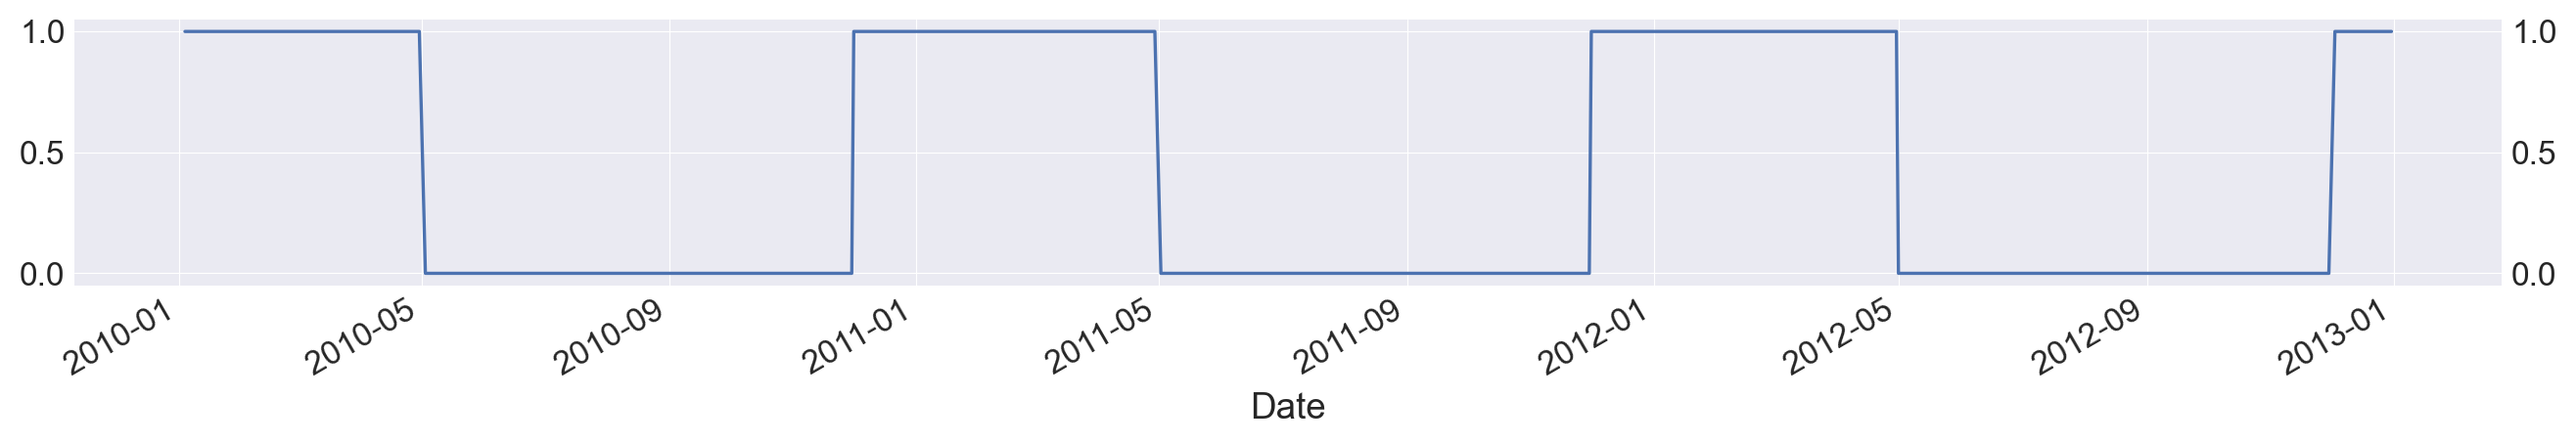

sell_month 5. sell_duration: 10
Strategy: sell_in_may_and_go_away(short from May - long from March)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +12.92 %. IR strategy: 0.79


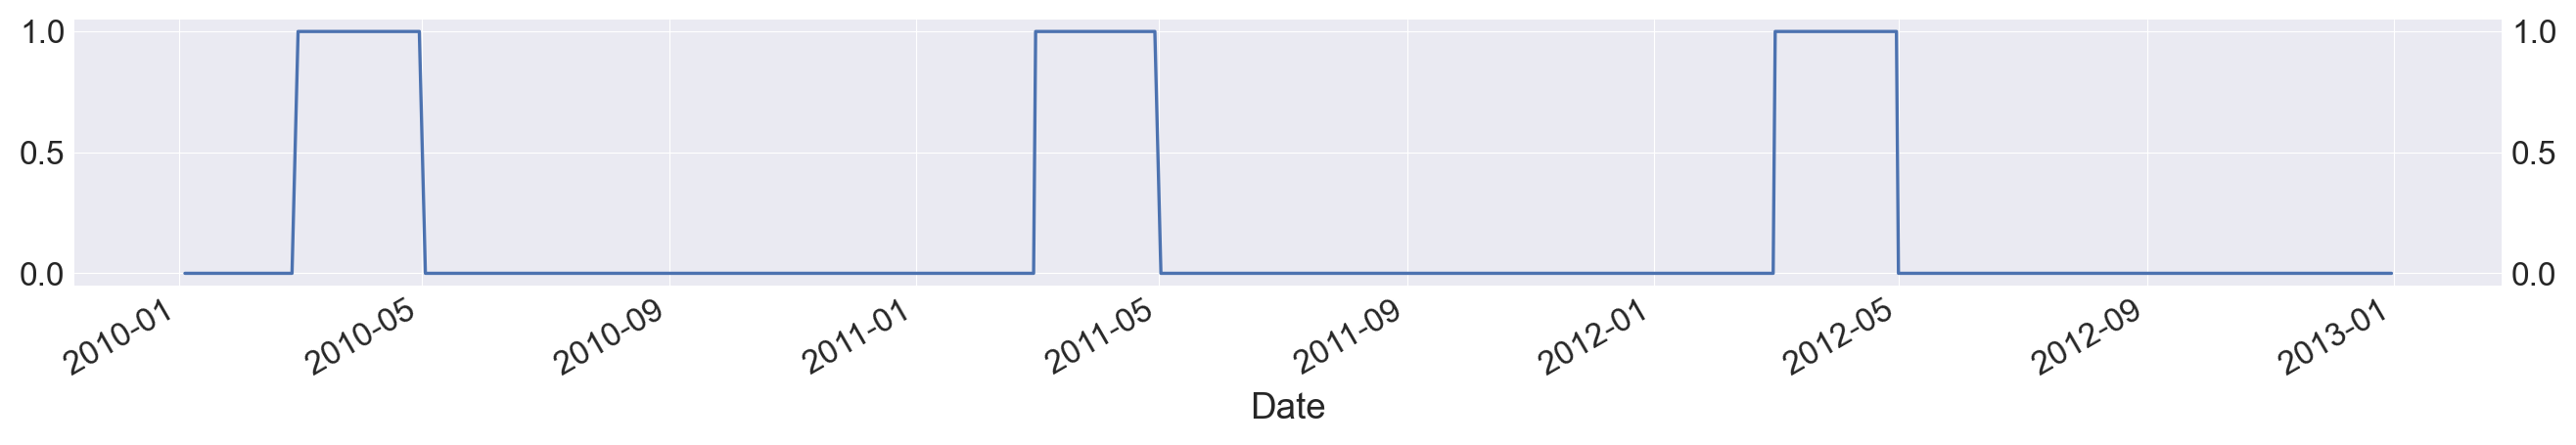

sell_month 7. sell_duration: 1
Strategy: sell_in_may_and_go_away(short from July - long from August)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +20.68 %. IR strategy: 0.36


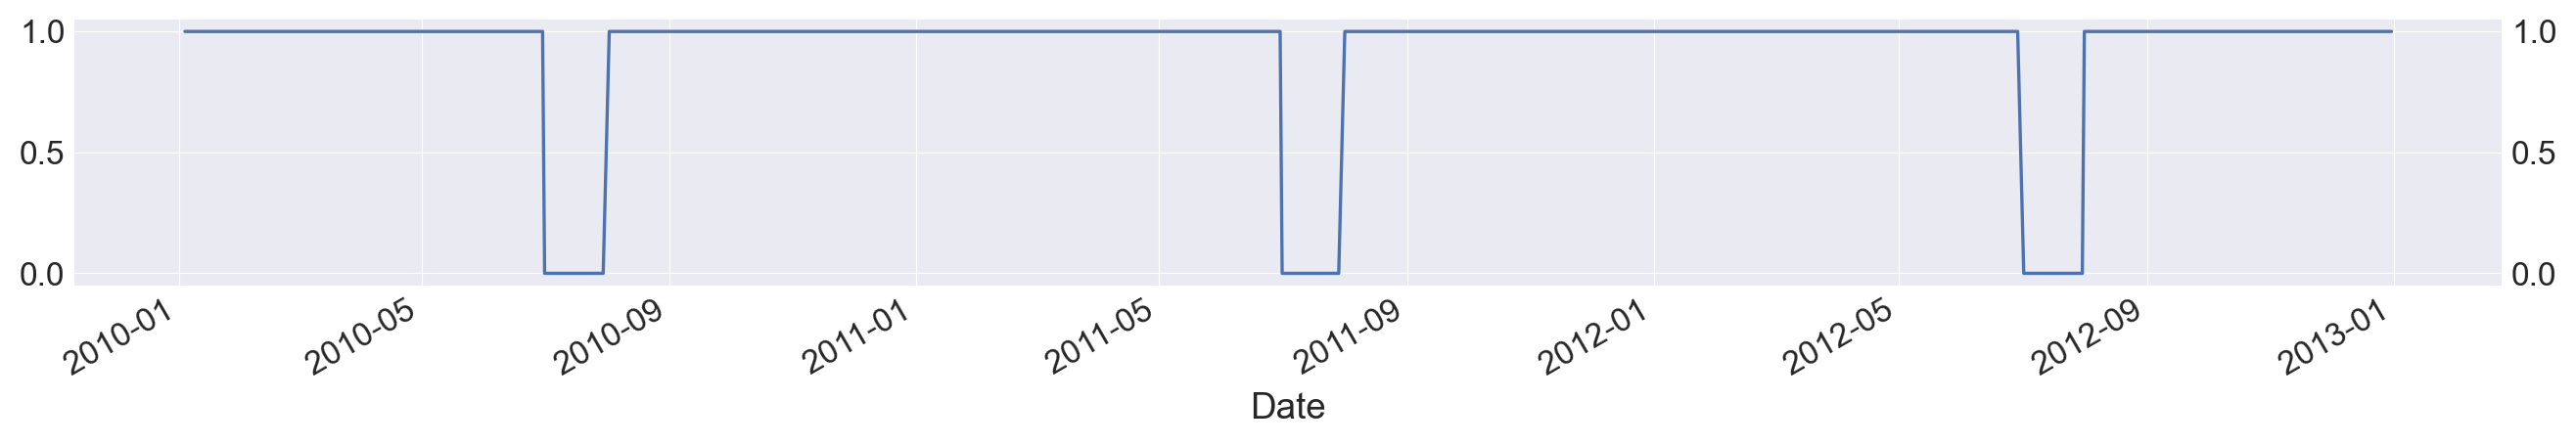

sell_month 7. sell_duration: 4
Strategy: sell_in_may_and_go_away(short from July - long from November)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +13.15 %. IR strategy: 0.31


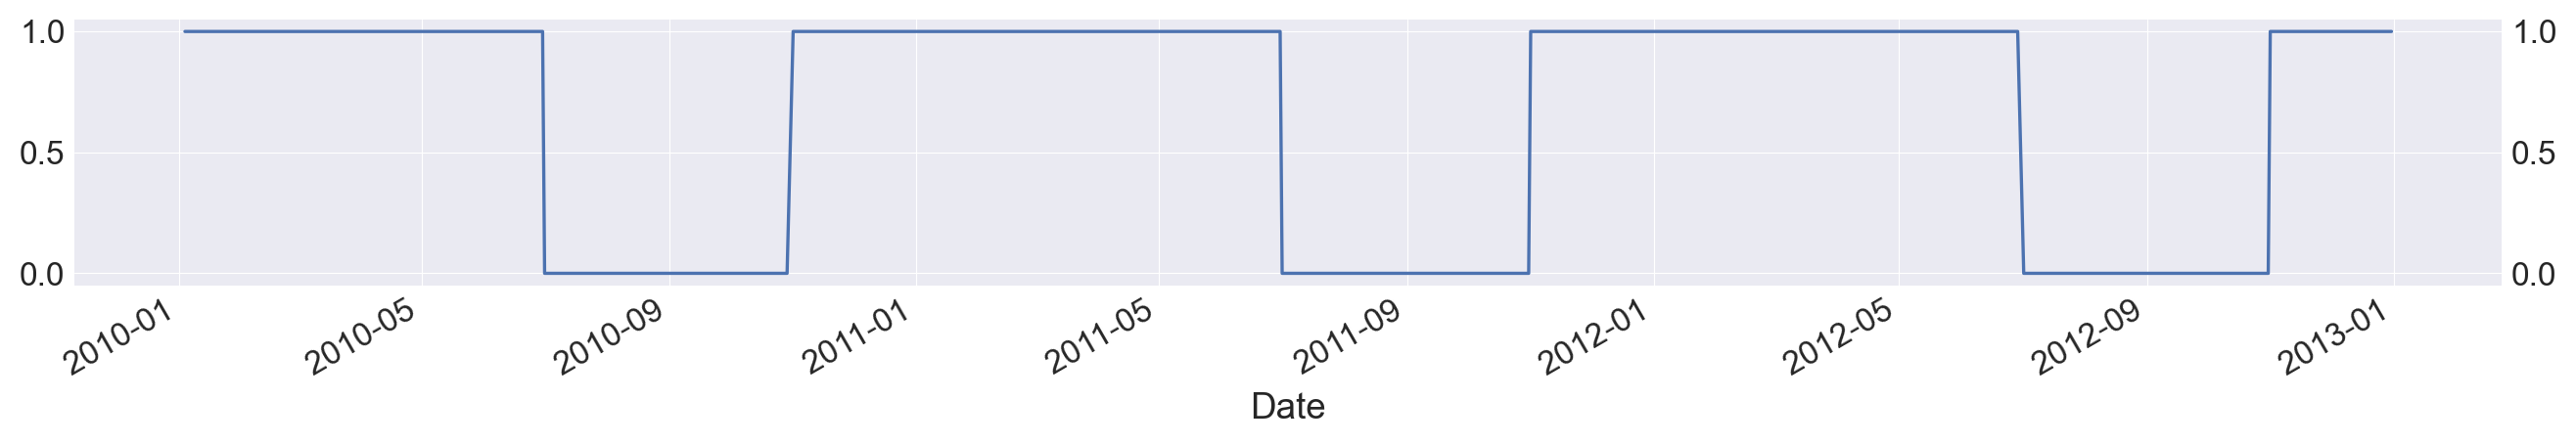

sell_month 7. sell_duration: 7
Strategy: sell_in_may_and_go_away(short from July - long from February)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +2.22 %. IR strategy: 0.07


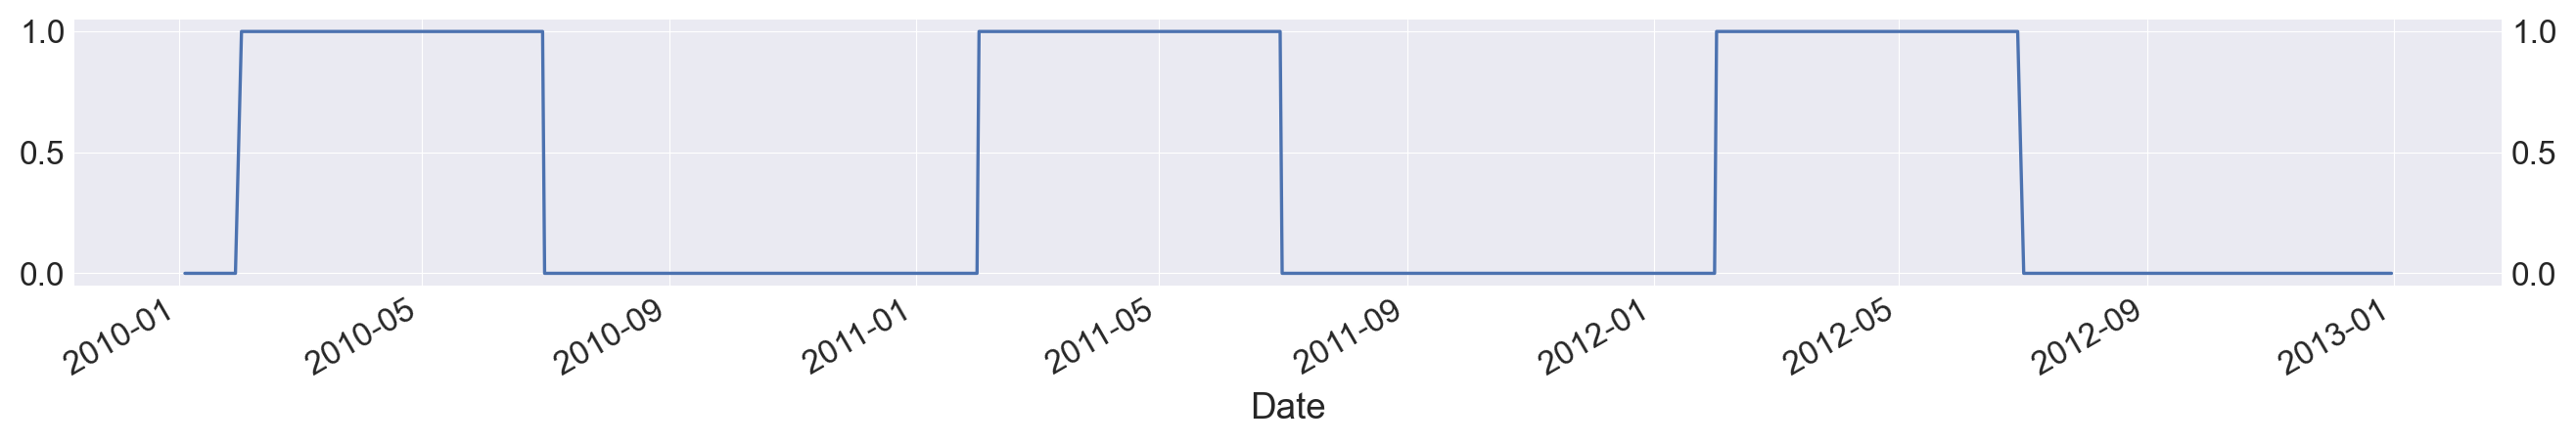

sell_month 7. sell_duration: 10
Strategy: sell_in_may_and_go_away(short from July - long from May)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: -18.09 %. IR strategy: -0.76


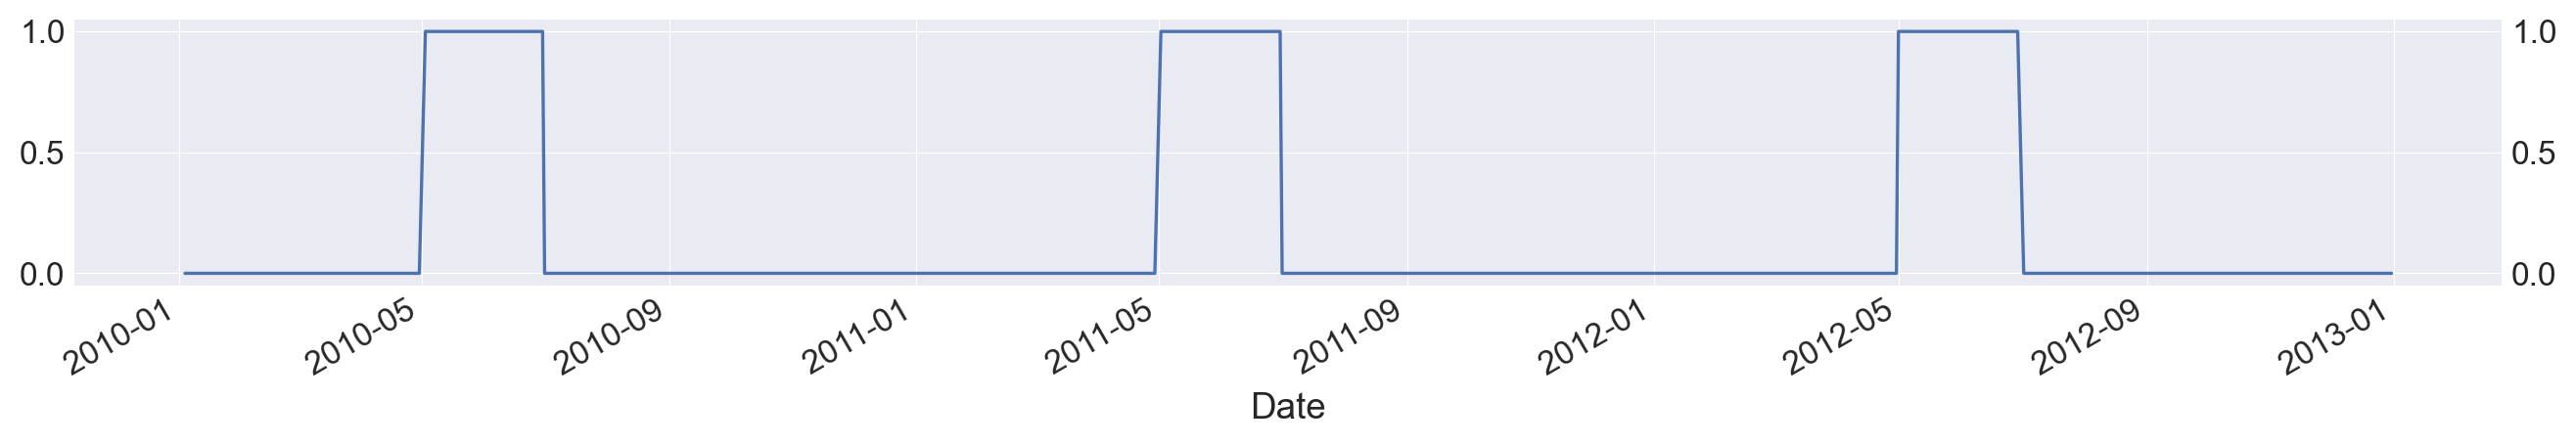

sell_month 9. sell_duration: 1
Strategy: sell_in_may_and_go_away(short from September - long from October)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +23.60 %. IR strategy: 0.42


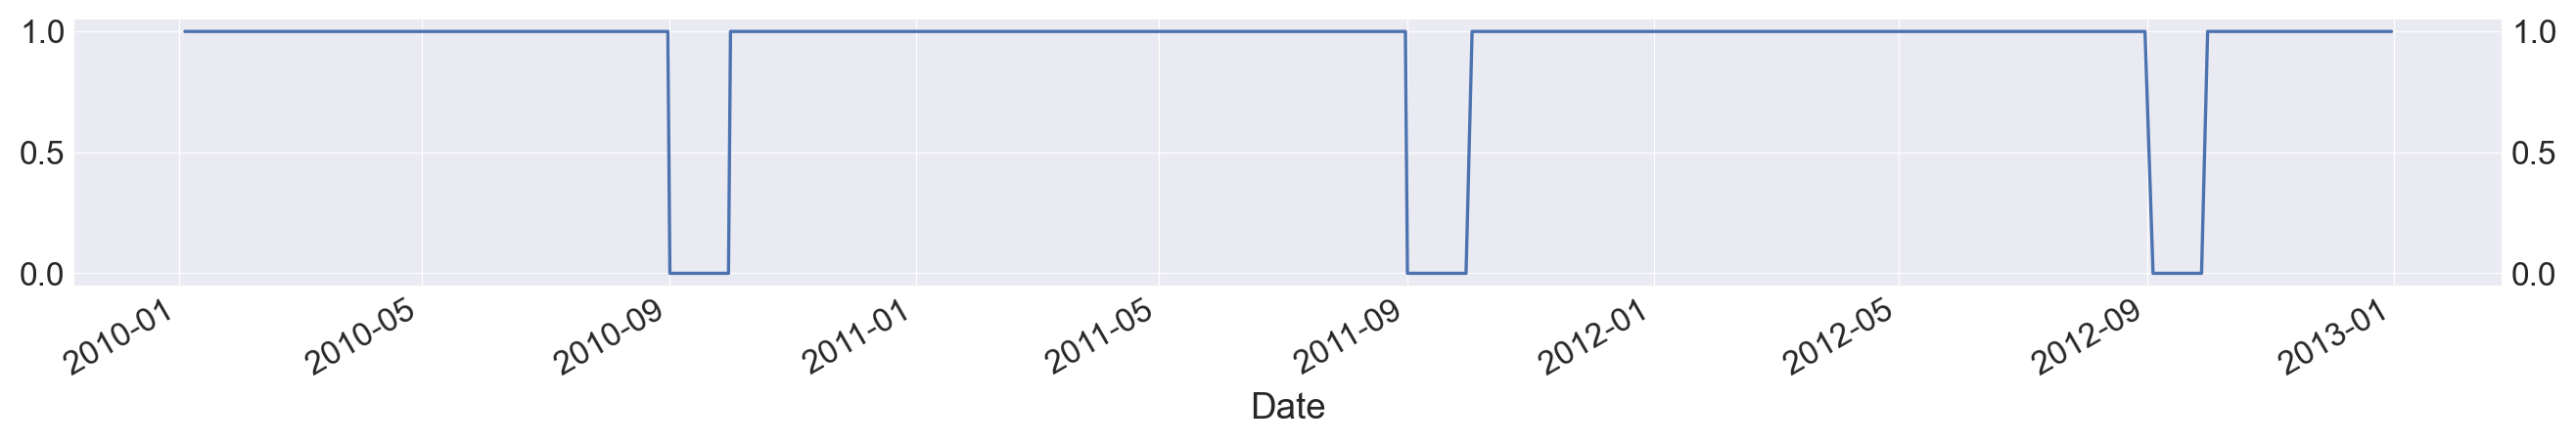

sell_month 9. sell_duration: 4
Strategy: sell_in_may_and_go_away(short from September - long from January)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +1.94 %. IR strategy: 0.04


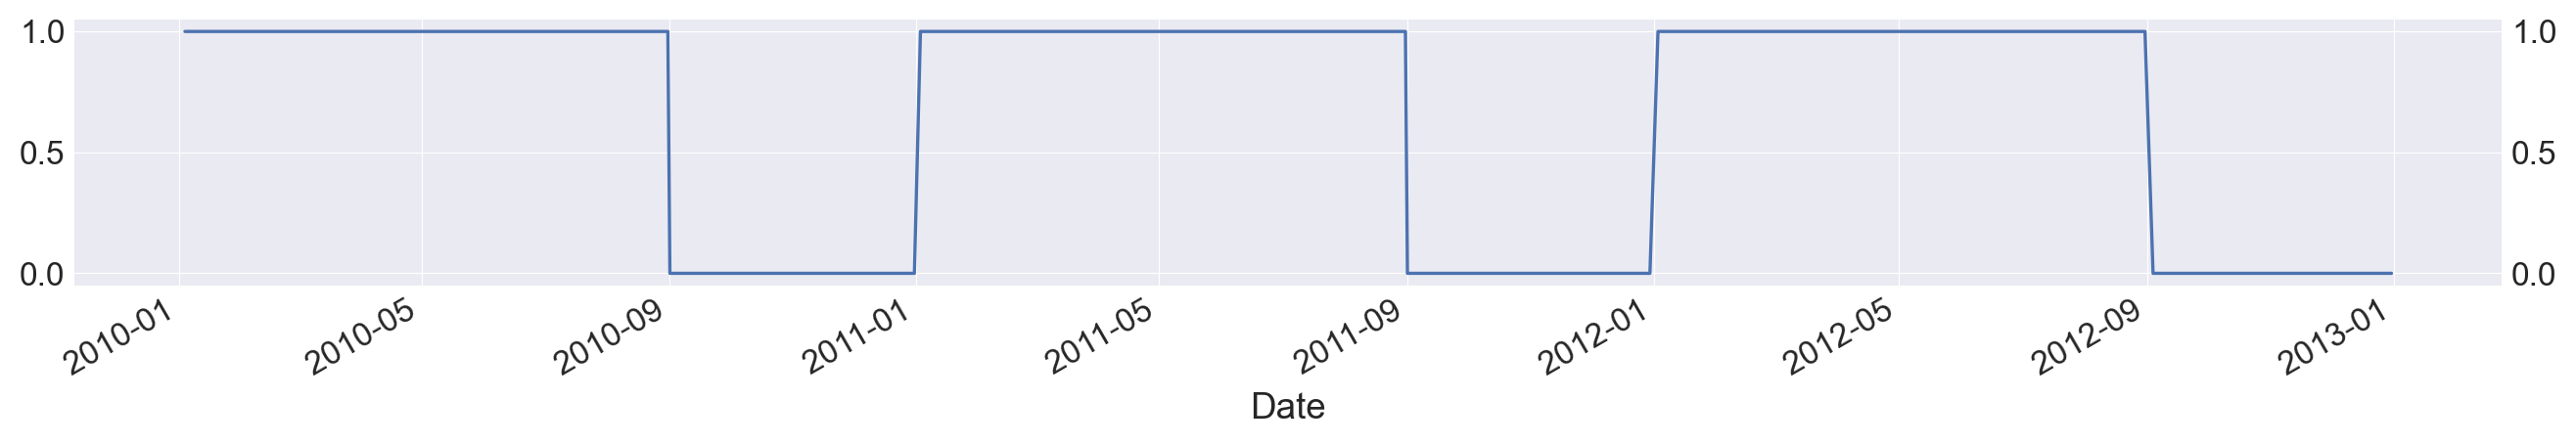

sell_month 9. sell_duration: 7
Strategy: sell_in_may_and_go_away(short from September - long from April)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: -17.67 %. IR strategy: -0.46


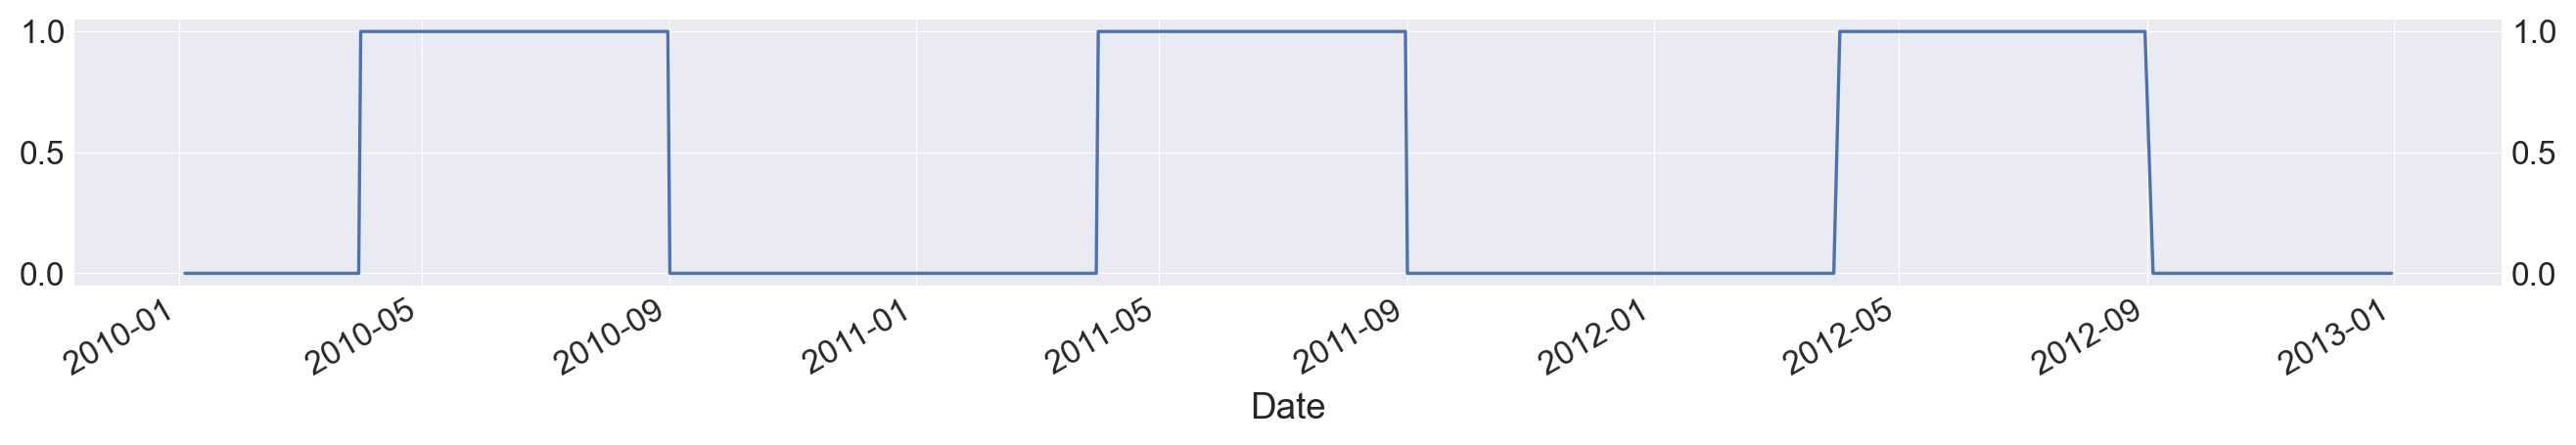

sell_month 9. sell_duration: 10
Strategy: sell_in_may_and_go_away(short from September - long from July)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: -3.04 %. IR strategy: -0.10


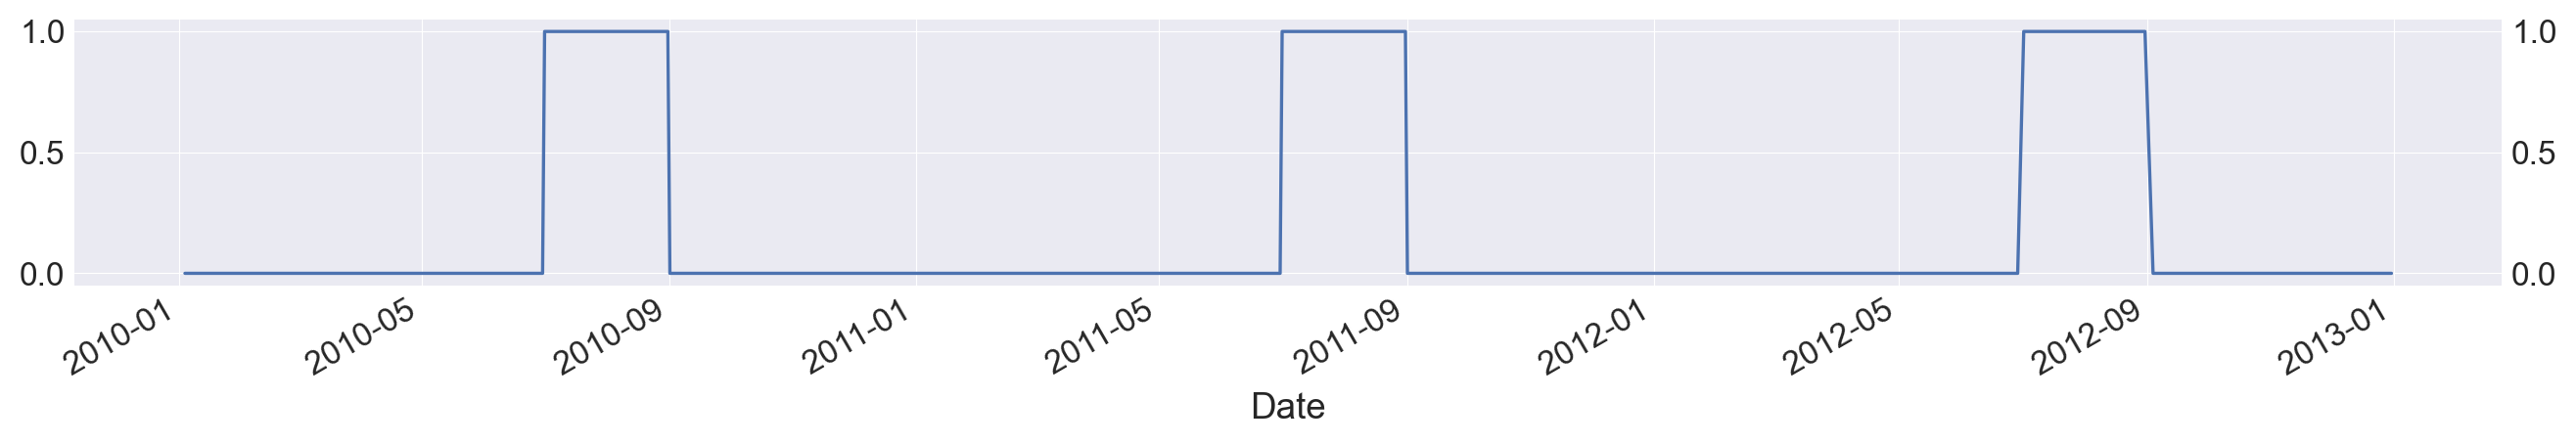

sell_month 11. sell_duration: 1
Strategy: sell_in_may_and_go_away(short from November - long from December)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +28.38 %. IR strategy: 0.50


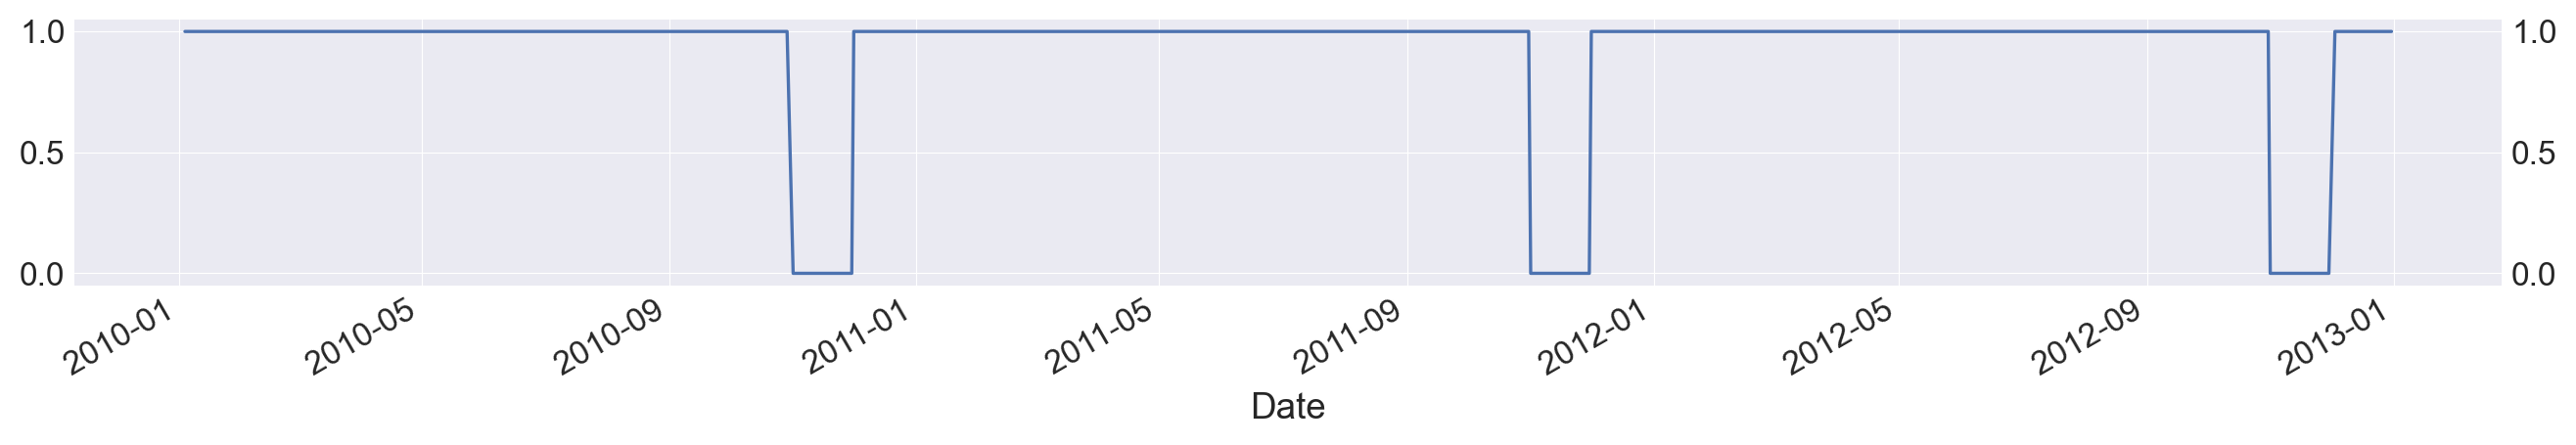

sell_month 11. sell_duration: 4
Strategy: sell_in_may_and_go_away(short from November - long from March)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +4.54 %. IR strategy: 0.09


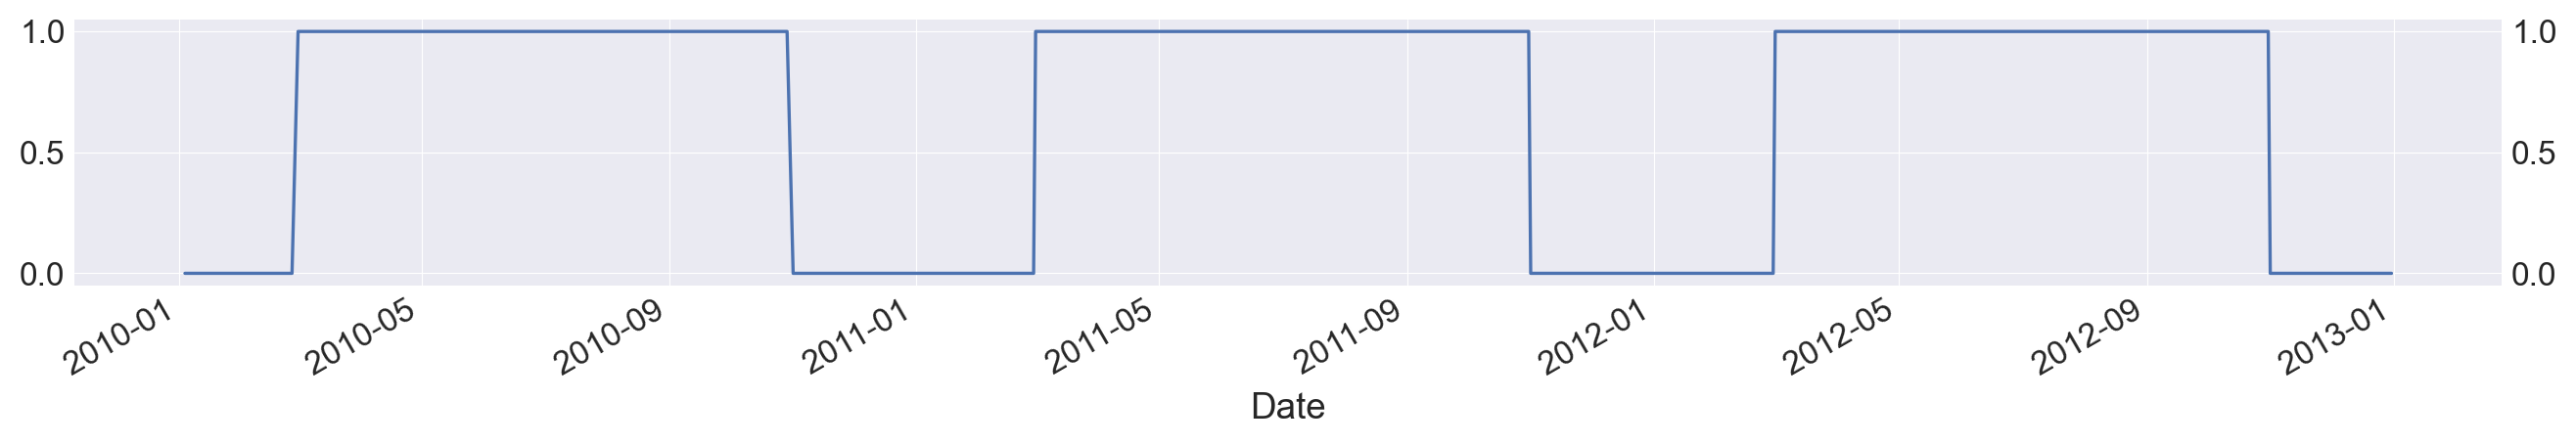

sell_month 11. sell_duration: 7
Strategy: sell_in_may_and_go_away(short from November - long from June)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +8.99 %. IR strategy: 0.21


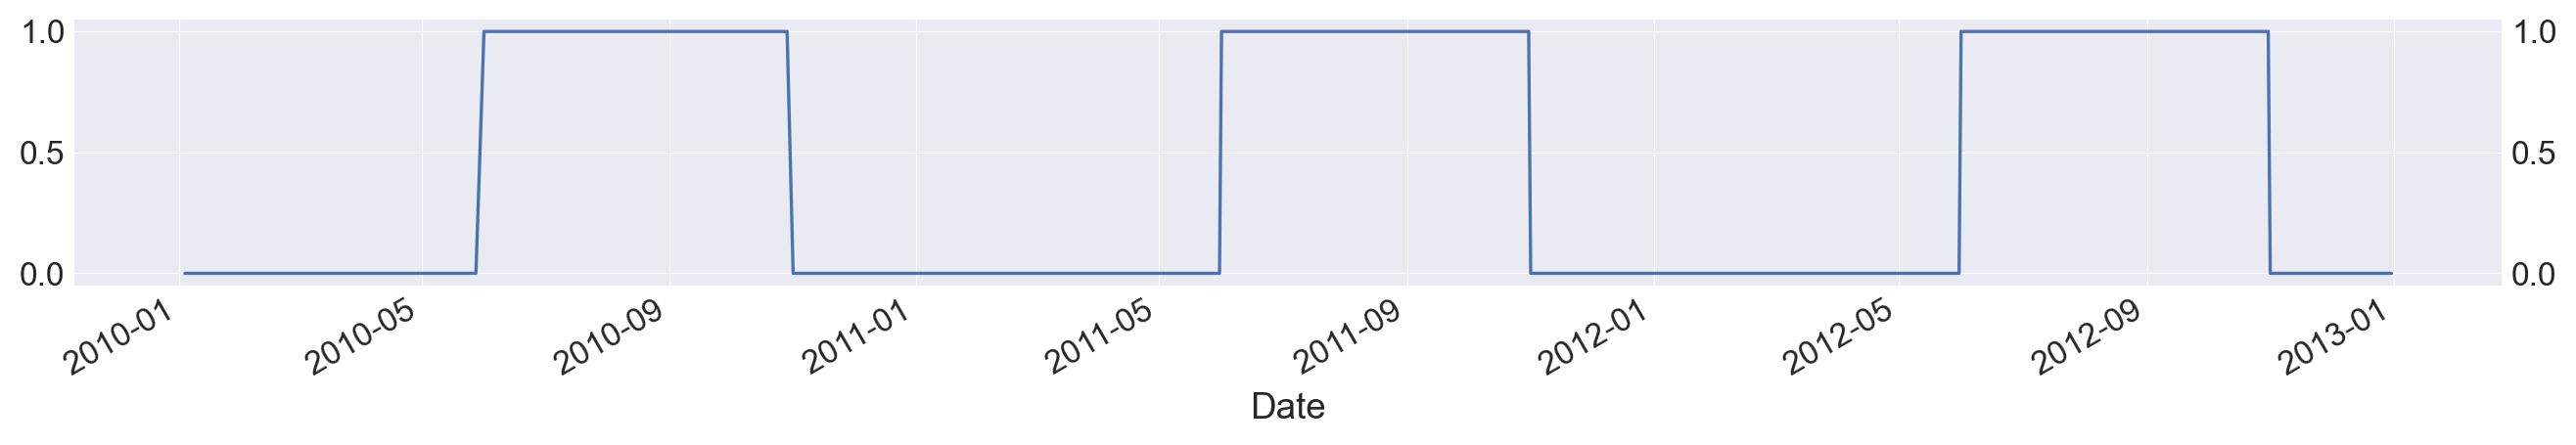

sell_month 11. sell_duration: 10
Strategy: sell_in_may_and_go_away(short from November - long from September)
Period: 2010-01-04 to 2012-12-31
	Overall return of SP500: +27.90 %. IR of SP500: 0.46
	Overall return of strategy: +16.33 %. IR strategy: 0.64


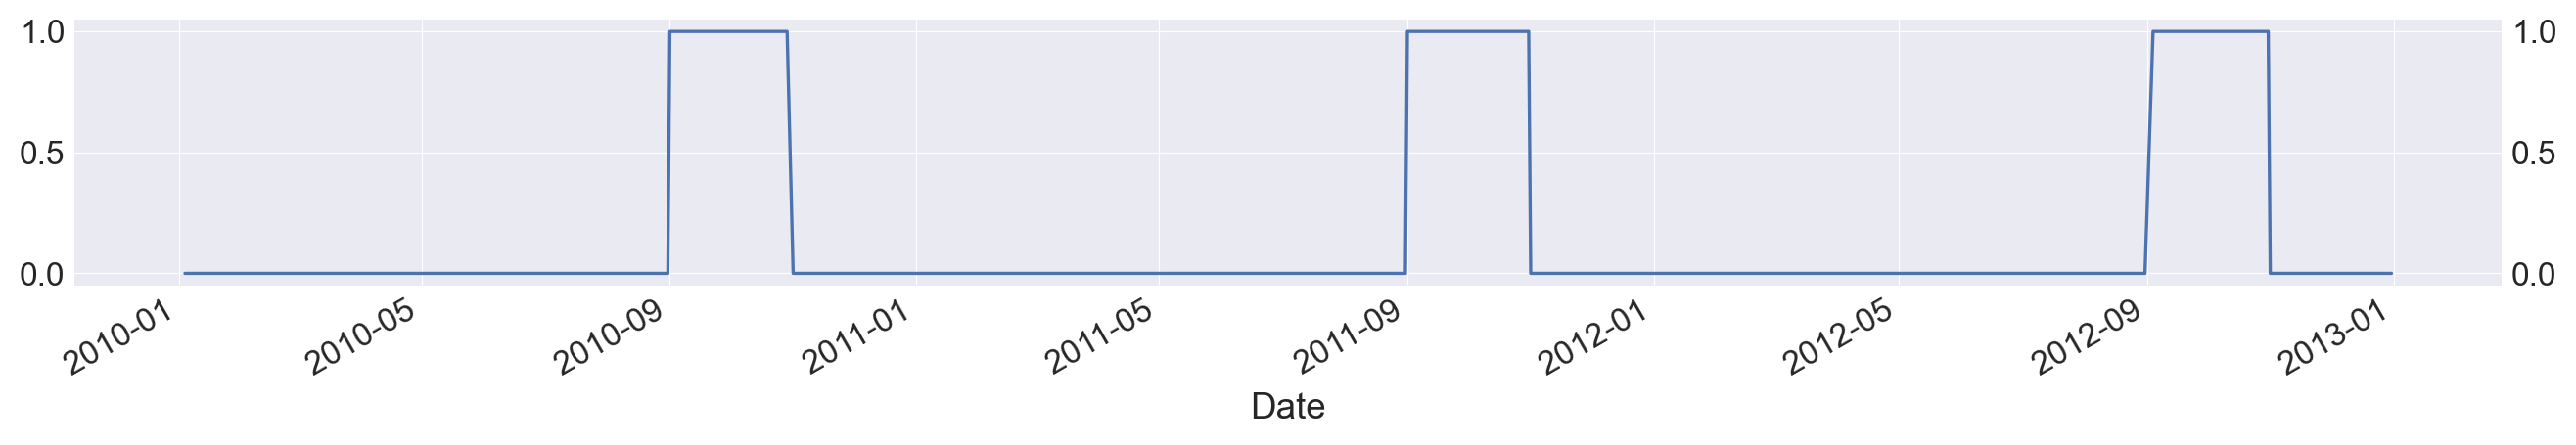

In [7]:
%run Functions.ipynb
import matplotlib.dates as mdates

# Random choice of parameters to check the strategy position
months = mdates.MonthLocator()  # every month
data['2010':'2012']['Close'].plot()
plt.show()

for i in range (1, 13, 2): # sell_month
    for j in range (1, 13, 3): # sell_duration
        df = data['2010':'2012'].copy()
        print(f'sell_month {i}. sell_duration: {j}')
        sell_month = i # 5 to sell in May
        sell_duration = j # 4 to sell for 4 months (May, June, July, August)
        strategy = sell_in_may_and_go_away(df, sell_month, sell_duration)
        df = backtest_print_plot(df, strategy, strat_name='sell_in_may_and_go_away', strat_params=(sell_month, sell_duration), plot=False)
        plt.show()
        _ = df['Strat_position'].plot(figsize=(16,2))
        plt.show()

## Test for checking changes in strategy position on the appropriate day

Strategy: sell_in_may_and_go_away(short from May - long from September)
Period: 2019-01-02 to 2019-12-31
	Overall return of SP500: +28.88 %. IR of SP500: 2.32
	Overall return of strategy: +29.69 %. IR strategy: 3.38


Close  Market_daily_ret  Strat_daily_ret  Strat_position     Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                          
2019-04-29  2943.030029          0.001072         0.001072             1.0  0.000000        0.0      117.399522     117.386427
2019-04-30  2945.830078          0.000951         0.000840             1.0  0.013106        0.0      117.511218     117.485005
2019-05-01  2923.729980         -0.007502         0.000000             0.0  0.000000        0.0      116.629629     117.485005
2019-05-02  2917.520020         -0.002124         0.000000             0.0  0.000000        0.0      116.381910     117.485005

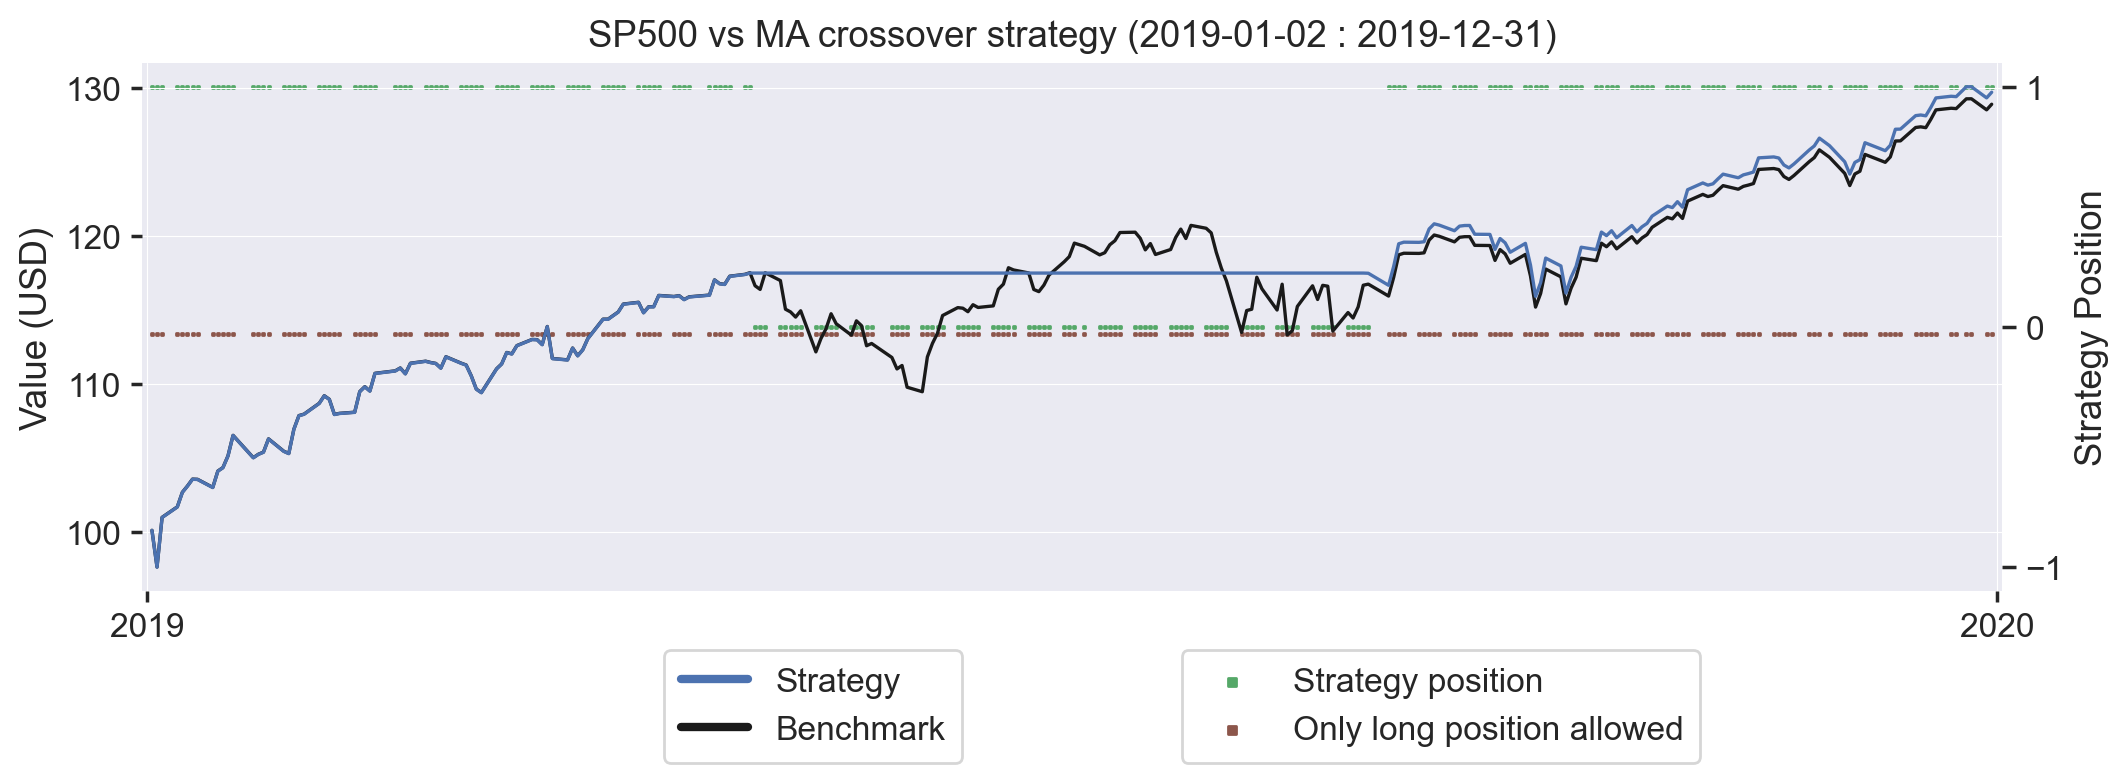

<AxesSubplot:xlabel='Date'>

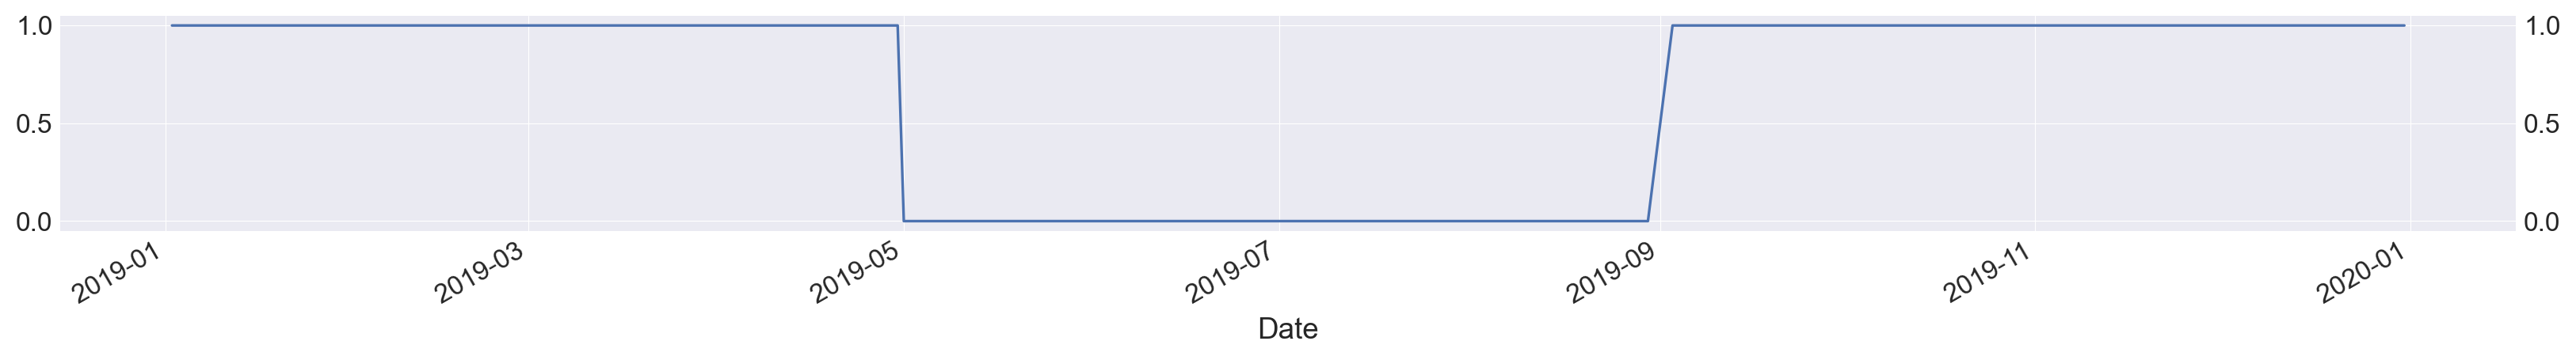

In [8]:
%run Functions.ipynb

df = data['2019'].copy()

sell_month = 5 # May
sell_duration = 4 # 4 months (May, June, July, August)
strategy = sell_in_may_and_go_away(df, sell_month, sell_duration)

df = backtest_print_plot(df, strategy, strat_name='sell_in_may_and_go_away', strat_params=(sell_month, sell_duration), with_legend=True)
df['2019-04-29':'2019-05-02']
plt.show()
df['Strat_position'].plot(figsize=(20,2))
plt.show()